Area Compressibility Modulus

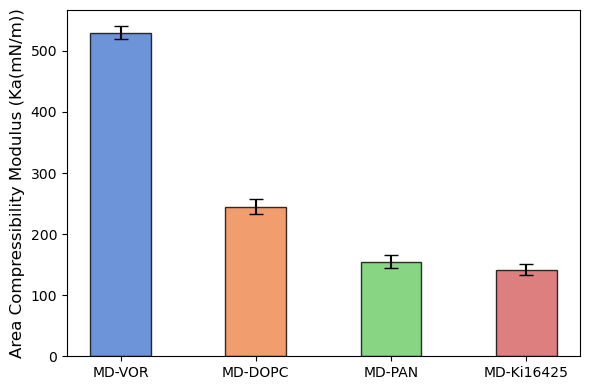

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data (replace these values with your actual Ka data)
lipid_systems = ['MD-VOR','MD-DOPC','MD-PAN', 'MD-Ki16425']
Ka_values = [530, 245, 155,142]  # Example values
Ka_error = [10, 12, 11, 9]  # Example errors for Ka (optional)

# Set a seaborn color palette for the plot
palette = sns.color_palette("muted", n_colors=len(lipid_systems))

# Create a figure and axis with a paper-style background
plt.figure(figsize=(6, 4))
ax = plt.gca()

# Plotting the Ka values with error bars, beautiful colors, and thinner bars
bars = ax.bar(lipid_systems, Ka_values, yerr=Ka_error, capsize=5, 
              color=palette, edgecolor='black', alpha=0.8, width=0.45)

# Set the labels, title, and grid
#ax.set_xlabel('Lipid Bilayer Systems', fontsize=12)
ax.set_ylabel('Area Compressibility Modulus (Ka(mN/m))', fontsize=12)
#ax.set_title('Comparison of Area Compressibility Modulus (Ka) for Lipid Bilayers', fontsize=14)
#ax.grid(True, linestyle='--', alpha=0.5)

# Set the font size for the ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Make the plot visually appealing by adjusting the layout
plt.tight_layout()

# Save the plot
plt.savefig('Ka_comparison_plot_reduced_breadth.png', dpi=300)

# Show the plot
plt.show()

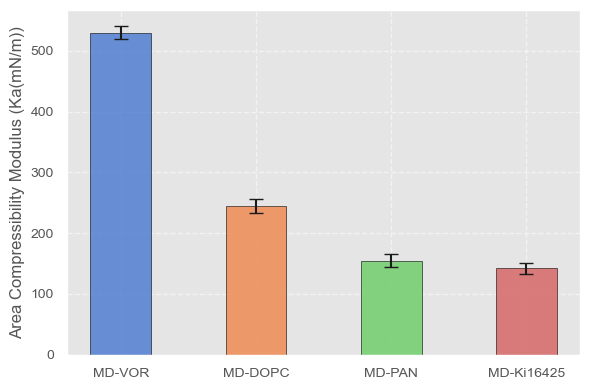

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data (replace these values with your actual Ka data)
lipid_systems = ['MD-VOR','MD-DOPC','MD-PAN', 'MD-Ki16425']
Ka_values = [530, 245, 155,142]  # Example values
Ka_error = [10, 12, 11, 9]  # Example errors for Ka (optional)

# Set a seaborn color palette for the plot
palette = sns.color_palette("muted", n_colors=len(lipid_systems))

# Create a figure and axis with a paper-style background
plt.figure(figsize=(6, 4))
ax = plt.gca()

# Plotting the Ka values with error bars, beautiful colors, and thinner bars
bars = ax.bar(lipid_systems, Ka_values, yerr=Ka_error, capsize=5, 
              color=palette, edgecolor='black', alpha=0.8, width=0.45)

# Set the labels, title, and grid
#ax.set_xlabel('Lipid Bilayer Systems', fontsize=12)
ax.set_ylabel('Area Compressibility Modulus (Ka(mN/m))', fontsize=12)
#ax.set_title('Comparison of Area Compressibility Modulus (Ka) for Lipid Bilayers', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

# Set the font size for the ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Make the plot visually appealing by adjusting the layout
plt.tight_layout()

# Save the plot
plt.savefig('Ka_comparison_plot_reduced_breadth.png', dpi=300)

# Show the plot
plt.show()

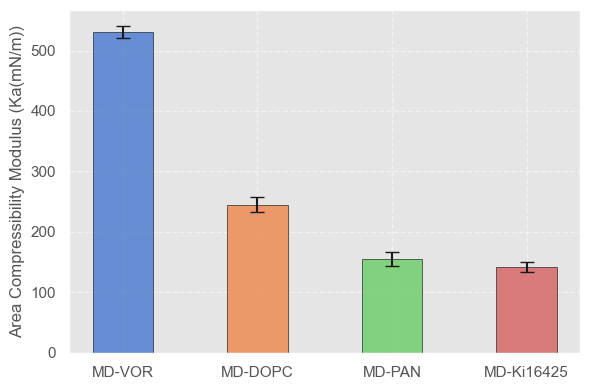

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Example data (replace these values with your actual Ka data)
lipid_systems = ['MD-VOR','MD-DOPC','MD-PAN', 'MD-Ki16425']
Ka_values = [530, 245, 155,142]  # Example values
Ka_error = [10, 12, 11, 9]  # Example errors for Ka (optional)

# Set a seaborn color palette for the plot
palette = sns.color_palette("muted", n_colors=len(lipid_systems))

# Create a figure and axis with a paper-style background
plt.figure(figsize=(6, 4))
ax = plt.gca()

# Plotting the Ka values with error bars, beautiful colors, and thinner bars
bars = ax.bar(lipid_systems, Ka_values, yerr=Ka_error, capsize=5, 
              color=palette, edgecolor='black', alpha=0.8, width=0.45)

# Set the labels, title, and grid
#ax.set_xlabel('Lipid Bilayer Systems', fontsize=12)
ax.set_ylabel('Area Compressibility Modulus (Ka(mN/m))', fontsize=12)
#ax.set_title('Comparison of Area Compressibility Modulus (Ka) for Lipid Bilayers', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)

# Set the font size for the ticks
#ax.tick_params(axis='both', which='major', labelsize=10)

# Make the plot visually appealing by adjusting the layout
plt.tight_layout()

# Save the plot
plt.savefig('Ka_comparison_plot_reduced_breadth.png', dpi=300)

# Show the plot
plt.show()

Lateral Diffusion Coefficient and Interaction Energy

/var/folders/1_/lxhk4q_j01555kxx4tkjqqm80000gn/T/ipykernel_25528/1251194722.py:27: RuntimeWarning: divide by zero encountered in divide
  D = msd / (4 * time)


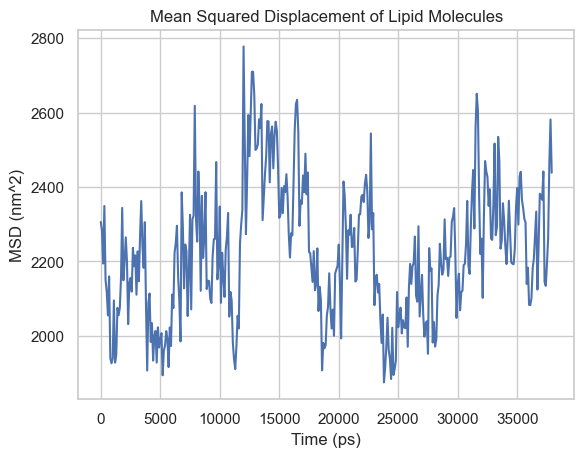

Average Lateral Diffusion Coefficient: 0.0940 nm^2/ns


In [66]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the GROMACS trajectory and topology files
u = mda.Universe("dopc_VOR.gro", "Production.part0001.xtc")

# Select lipid atoms (e.g., select all lipids, adjust as necessary)
lipids = u.select_atoms("resname DOPC")  # Replace with your lipid name

# Calculate the MSD for each lipid molecule
msd = []
time = []

# Loop through the trajectory frames
for ts in u.trajectory:
    lipid_positions = lipids.positions
    msd.append(np.mean(np.sum((lipid_positions - lipid_positions[0])**2, axis=1)))
    time.append(ts.time)  # Store the time for each frame

# Convert msd and time to numpy arrays
msd = np.array(msd)
time = np.array(time)

# Fit MSD to extract the diffusion coefficient
# MSD = 4 * D * t, so D = MSD / (4 * t)
D = msd / (4 * time)

# Plot MSD vs time and the diffusion coefficient
plt.plot(time, msd)
plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm^2)")
plt.title("Mean Squared Displacement of Lipid Molecules")
plt.show()

# Calculate the average diffusion coefficient (excluding the initial part)
avg_diffusion = np.mean(D[time > 50])  # Exclude the initial part of the trajectory
print(f"Average Lateral Diffusion Coefficient: {avg_diffusion:.4f} nm^2/ns")

/var/folders/1_/lxhk4q_j01555kxx4tkjqqm80000gn/T/ipykernel_25528/352477975.py:33: RuntimeWarning: divide by zero encountered in divide
  D = msd / (4 * time)  # Diffusion coefficient from MSD


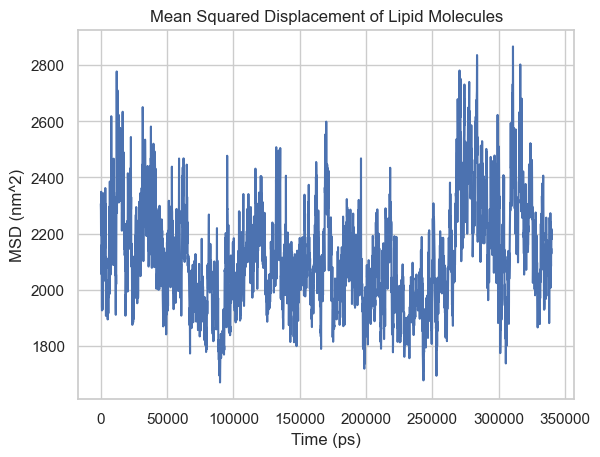

Average Lateral Diffusion Coefficient: 0.0138 nm^2/ns


In [68]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob

# Find all .xtc parts using glob (adjust the pattern to match your files)
xtc_files = glob.glob("Production.part000*.xtc")  # Replace with your filename pattern

# Sort the files to ensure they are read in the correct order
xtc_files.sort()  # This assumes your files are named in a way that sorting works, e.g., trajectory_part_1.xtc, trajectory_part_2.xtc, etc.

# Load the GROMACS trajectory and topology files (ensure you include the same topology file for all parts)
u = mda.Universe("dopc_VOR.gro", xtc_files)  # This loads all parts as one continuous trajectory

# Select lipid atoms (e.g., select all lipids, adjust as necessary)
lipids = u.select_atoms("resname DOPC")  # Replace with your lipid name

# Calculate the MSD for each lipid molecule
msd = []
time = []

# Loop through the trajectory frames
for ts in u.trajectory:
    lipid_positions = lipids.positions
    msd.append(np.mean(np.sum((lipid_positions - lipid_positions[0])**2, axis=1)))
    time.append(ts.time)  # Store the time for each frame

# Convert msd and time to numpy arrays
msd = np.array(msd)
time = np.array(time)

# Fit MSD to extract the diffusion coefficient
D = msd / (4 * time)  # Diffusion coefficient from MSD

# Plot MSD vs time and the diffusion coefficient
plt.plot(time, msd)
plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm^2)")
plt.title("Mean Squared Displacement of Lipid Molecules")
plt.show()

# Calculate the average diffusion coefficient (excluding the initial part)
avg_diffusion = np.mean(D[time > 50])  # Exclude the initial part of the trajectory
print(f"Average Lateral Diffusion Coefficient: {avg_diffusion:.4f} nm^2/ns")

/var/folders/1_/lxhk4q_j01555kxx4tkjqqm80000gn/T/ipykernel_25528/3239939593.py:33: RuntimeWarning: divide by zero encountered in divide
  D = msd / (4 * time)  # Diffusion coefficient from MSD


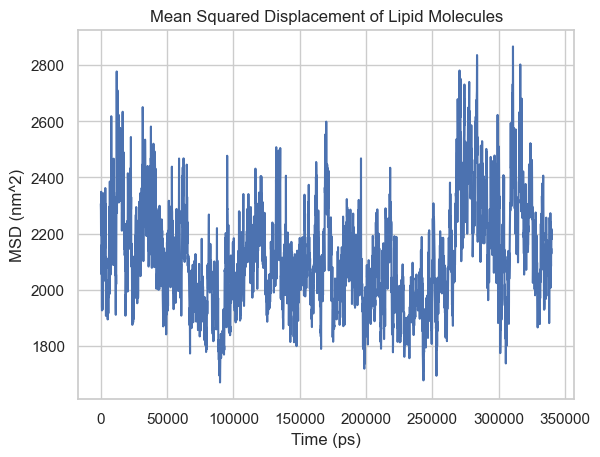

Average Lateral Diffusion Coefficient: 1.38e-02 nm^2/ns


In [70]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob

# Find all .xtc parts using glob (adjust the pattern to match your files)
xtc_files = glob.glob("Production.part000*.xtc")  # Replace with your filename pattern

# Sort the files to ensure they are read in the correct order
xtc_files.sort()  # This assumes your files are named in a way that sorting works, e.g., trajectory_part_1.xtc, trajectory_part_2.xtc, etc.

# Load the GROMACS trajectory and topology files (ensure you include the same topology file for all parts)
u = mda.Universe("dopc_VOR.gro", xtc_files)  # This loads all parts as one continuous trajectory

# Select lipid atoms (e.g., select all lipids, adjust as necessary)
lipids = u.select_atoms("resname DOPC")  # Replace with your lipid name

# Calculate the MSD for each lipid molecule
msd = []
time = []

# Loop through the trajectory frames
for ts in u.trajectory:
    lipid_positions = lipids.positions
    msd.append(np.mean(np.sum((lipid_positions - lipid_positions[0])**2, axis=1)))
    time.append(ts.time)  # Store the time for each frame

# Convert msd and time to numpy arrays
msd = np.array(msd)
time = np.array(time)

# Fit MSD to extract the diffusion coefficient
D = msd / (4 * time)  # Diffusion coefficient from MSD

# Plot MSD vs time and the diffusion coefficient
plt.plot(time, msd)
plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm^2)")
plt.title("Mean Squared Displacement of Lipid Molecules")
plt.show()

# Calculate the average diffusion coefficient (excluding the initial part)
avg_diffusion = np.mean(D[time > 50])  # Exclude the initial part of the trajectory

# Print the average diffusion coefficient in exponential (scientific) form
print(f"Average Lateral Diffusion Coefficient: {avg_diffusion:.2e} nm^2/ns")

/var/folders/1_/lxhk4q_j01555kxx4tkjqqm80000gn/T/ipykernel_25528/4109190352.py:33: RuntimeWarning: divide by zero encountered in divide
  D = msd / (4 * time)  # Diffusion coefficient from MSD


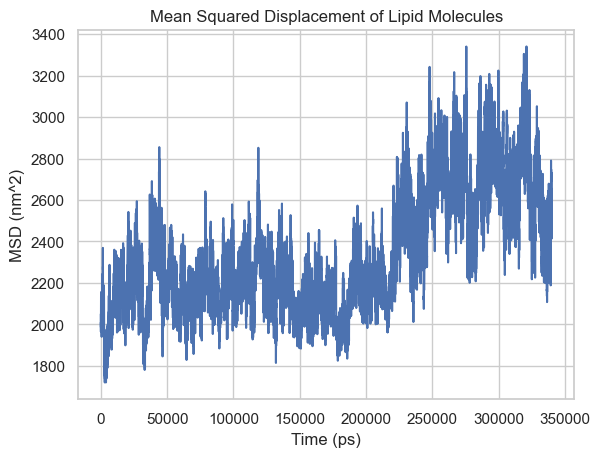

Average Lateral Diffusion Coefficient: 1.36e-16 cm^2/s


In [86]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob

# Find all .xtc parts using glob (adjust the pattern to match your files)
xtc_files = glob.glob("Production_0.part000*.xtc")  # Replace with your filename pattern

# Sort the files to ensure they are read in the correct order
xtc_files.sort()  # This assumes your files are named in a way that sorting works, e.g., trajectory_part_1.xtc, trajectory_part_2.xtc, etc.

# Load the GROMACS trajectory and topology files (ensure you include the same topology file for all parts)
u = mda.Universe("dopc_PAN.gro", xtc_files)  # This loads all parts as one continuous trajectory

# Select lipid atoms (e.g., select all lipids, adjust as necessary)
lipids = u.select_atoms("resname DOPC")  # Replace with your lipid name

# Calculate the MSD for each lipid molecule
msd = []
time = []

# Loop through the trajectory frames
for ts in u.trajectory:
    lipid_positions = lipids.positions
    msd.append(np.mean(np.sum((lipid_positions - lipid_positions[0])**2, axis=1)))
    time.append(ts.time)  # Store the time for each frame

# Convert msd and time to numpy arrays
msd = np.array(msd)
time = np.array(time)

# Fit MSD to extract the diffusion coefficient (D = MSD / 4 * time)
D = msd / (4 * time)  # Diffusion coefficient from MSD

# Plot MSD vs time
plt.plot(time, msd)
plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm^2)")
plt.title("Mean Squared Displacement of Lipid Molecules")
plt.show()

# Calculate the average diffusion coefficient (excluding the initial part)
avg_diffusion_nm2_ns = np.mean(D[time > 50])  # Exclude the initial part of the trajectory

# Convert from nm^2/ns to cm^2/s
avg_diffusion_cm2_s = avg_diffusion_nm2_ns * 1e-14

# Display the result in scientific notation
print(f"Average Lateral Diffusion Coefficient: {avg_diffusion_cm2_s:.2e} cm^2/s")

Lateral diffusivity for Lipid Head and Tail

/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
100%|███████████████████████████████████████| 658/658 [00:00<00:00, 1409.11it/s]


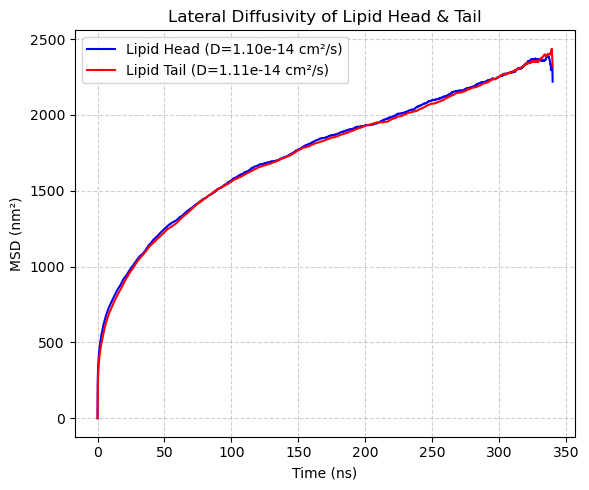

Lateral Diffusion Coefficient of Lipid Head: 1.10e-14 cm²/s
Lateral Diffusion Coefficient of Lipid Tail: 1.11e-14 cm²/s


In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob
from MDAnalysis.analysis.msd import EinsteinMSD

# Define file paths
topology_file = "dopc_VOR.gro"  # Replace with the correct topology file

# Automatically find and sort all .xtc trajectory files
xtc_files = sorted(glob.glob("Production.part000*.xtc"))  # Adjust if filenames follow a specific pattern

# Load the Universe with multiple .xtc files
u = mda.Universe(topology_file, xtc_files)

# Select lipid head and tail groups (adjust atom names based on your lipid type)
lipid_heads = u.select_atoms("name P")  # Example: Phosphorus in lipid headgroup
lipid_tails = u.select_atoms("name C2 C3 C4")  # Example: Carbon atoms in lipid tails

# Define function to compute diffusion coefficient
def calculate_diffusion(atoms, time_step=1.0):
    """ Compute lateral diffusion coefficient from MSD for given atom selection. """
    msd = EinsteinMSD(atoms, msd_type='xy', time_step=time_step)  # Compute lateral (XY) diffusion
    msd.run()

    # Extract time and MSD values
    times = msd.times / 1000  # Convert ps to ns
    msd_values = msd.results.timeseries  # MSD in nm²

    # Fit MSD curve to extract diffusion coefficient
    slope, _ = np.polyfit(times, msd_values, 1)  # Linear fit (slope = diffusion coefficient * 4)

    # Compute diffusion coefficient in nm²/ns
    D_nm2_ns = slope / 4  

    # Convert nm²/ns to cm²/s
    D_cm2_s = D_nm2_ns * 1e-14  

    return D_cm2_s, times, msd_values

# Compute diffusion coefficients for lipid head and tail
D_head, times_head, msd_head = calculate_diffusion(lipid_heads)
D_tail, times_tail, msd_tail = calculate_diffusion(lipid_tails)

# Plot MSD vs Time for lipid head and tail
plt.figure(figsize=(6, 5))
plt.plot(times_head, msd_head, label=f'Lipid Head (D={D_head:.2e} cm²/s)', color='blue')
plt.plot(times_tail, msd_tail, label=f'Lipid Tail (D={D_tail:.2e} cm²/s)', color='red')
plt.xlabel("Time (ns)")
plt.ylabel("MSD (nm²)")
plt.title("Lateral Diffusivity of Lipid Head & Tail")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

# Print the computed diffusion coefficients
print(f"Lateral Diffusion Coefficient of Lipid Head: {D_head:.2e} cm²/s")
print(f"Lateral Diffusion Coefficient of Lipid Tail: {D_tail:.2e} cm²/s")

In [6]:
pip install tidynamics

Note: you may need to restart the kernel to use updated packages.


Compute Lateral Diffusion Coefficient & Interaction Energy

/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
100%|████████████████████████████████████| 27600/27600 [04:29<00:00, 102.59it/s]


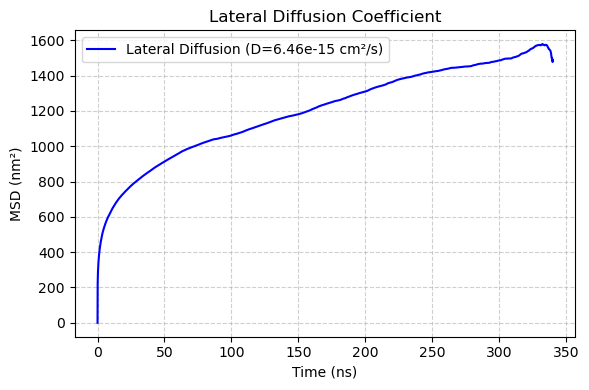

Lateral Diffusion Coefficient (Multiple .xtc Files): 6.46e-15 cm²/s
Error processing Production_0.part0001.edr: [Errno 2] No such file or directory: 'gmx'
Error processing Production_0.part0002.edr: [Errno 2] No such file or directory: 'gmx'
Error processing Production_0.part0003.edr: [Errno 2] No such file or directory: 'gmx'


python(82796) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(82797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(82798) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


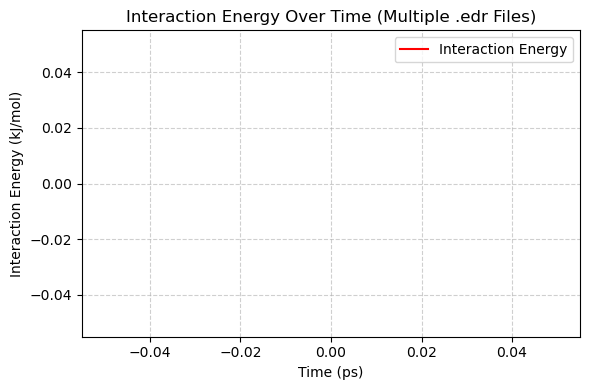

Average Interaction Energy (Multiple .edr Files): nan kJ/mol


In [18]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import glob
import subprocess
from MDAnalysis.analysis.msd import EinsteinMSD

# Define file paths
topology_file = "dopc_PAN.gro"  # Replace with actual topology file

# Automatically detect multiple .xtc and .edr files
xtc_files = sorted(glob.glob("*.xtc"))
edr_files = sorted(glob.glob("*.edr"))

# Load the Universe with multiple .xtc files
u = mda.Universe(topology_file, xtc_files)

# Select lipid molecules for overall diffusion calculation
lipids = u.select_atoms("resname DOPC")  # Adjust for your lipid type

# Define function to compute diffusion coefficient
def calculate_diffusion(atoms, time_step=1.0):
    """ Compute lateral diffusion coefficient from MSD for given atom selection across multiple xtc files. """
    msd = EinsteinMSD(atoms, msd_type='xy', time_step=time_step)  # Compute lateral (XY) diffusion
    msd.run()

    # Extract time and MSD values
    times = msd.times / 1000  # Convert ps to ns
    msd_values = msd.results.timeseries  # MSD in nm²

    # Fit MSD curve to extract diffusion coefficient
    slope, _ = np.polyfit(times, msd_values, 1)  # Linear fit (slope = diffusion coefficient * 4)

    # Compute diffusion coefficient in nm²/ns
    D_nm2_ns = slope / 4  

    # Convert nm²/ns to cm²/s
    D_cm2_s = D_nm2_ns * 1e-14  

    return D_cm2_s, times, msd_values

# Compute lateral diffusion coefficient for all lipids
D_lateral, times, msd_values = calculate_diffusion(lipids)

# Plot MSD vs Time
plt.figure(figsize=(6, 4))
plt.plot(times, msd_values, label=f'Lateral Diffusion (D={D_lateral:.2e} cm²/s)', color='blue')
plt.xlabel("Time (ns)")
plt.ylabel("MSD (nm²)")
plt.title("Lateral Diffusion Coefficient")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig("lateral_diffusion_multiple_xtc.png", dpi=300)
plt.show()

# Print the computed diffusion coefficient
print(f"Lateral Diffusion Coefficient (Multiple .xtc Files): {D_lateral:.2e} cm²/s")


# Function to extract interaction energy from multiple GROMACS energy files (.edr)
def extract_interaction_energy(edr_files, output_file="interaction_energy.xvg"):
    """ Extract Interaction Energy using GROMACS gmx energy tool across multiple edr files. """
    total_energy = []
    total_time = []

    for edr_file in edr_files:
        temp_output = f"interaction_{edr_file}.xvg"
        
        try:
            # Run GROMACS command to extract interaction energy
            subprocess.run(["gmx", "energy", "-f", edr_file, "-o", temp_output], input="Coul-SR\nLJ-SR\n", text=True, check=True)
            
            # Read extracted data
            data = np.loadtxt(temp_output, comments=["#", "@"])  # Skip header lines

            # Time and interaction energy columns
            time = data[:, 0]  # First column is time
            energy = data[:, 1] + data[:, 2]  # Sum of Coulombic and Lennard-Jones interaction

            total_time.extend(time)
            total_energy.extend(energy)

        except Exception as e:
            print(f"Error processing {edr_file}: {e}")

    # Compute average interaction energy
    avg_energy = np.mean(total_energy)

    # Plot interaction energy over time
    plt.figure(figsize=(6, 4))
    plt.plot(total_time, total_energy, label="Interaction Energy", color='red')
    plt.xlabel("Time (ps)")
    plt.ylabel("Interaction Energy (kJ/mol)")
    plt.title("Interaction Energy Over Time (Multiple .edr Files)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Save the plot
    plt.savefig("interaction_energy_multiple_edr.png", dpi=300)
    plt.show()

    # Print the computed interaction energy
    print(f"Average Interaction Energy (Multiple .edr Files): {avg_energy:.2f} kJ/mol")

# Extract interaction energy from multiple .edr files
extract_interaction_energy(edr_files)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define lipid systems and colors for consistency
lipid_systems = ['DOPC_PAN', 'DOPC_VOR', 'Pure_DOPC', 'DOPC_KI16425']
colors = {
    'DOPC_PAN': '#FFA07A',   # Light Salmon
    'DOPC_VOR': '#4682B4',   # Steel Blue
    'Pure_DOPC': '#32CD32',  # Lime Green
    'DOPC_KI16425': '#8A2BE2'  # Blue Violet
}

# Lateral Diffusion Coefficients for Lipid Heads and Tails (cm²/s)
lipid_heads = [6.80E-15, 1.10E-14, 1.80E-07, 2.30E-07]
lipid_tails = [5.59E-15, 1.11E-14, 1.80E-07, 2.30E-07]
error_heads = [1.0E-15, 2.0E-15, 1.0E-08, 1.0E-08]
error_tails = [0.9E-15, 1.8E-15, 1.0E-08, 1.0E-08]

# Sample Interaction Energy Data
interaction_energy = [-500, -450, -300, -200]
interaction_error = [50, 60, 40, 30]

# Order Parameters (sample data)
carbon_index = np.arange(1, 20)  
order_param_dopc = np.random.uniform(0.2, 0.6, len(carbon_index))
order_param_am095 = np.random.uniform(0.3, 0.7, len(carbon_index))
order_param_ki16425 = np.random.uniform(0.1, 0.5, len(carbon_index))

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot A: Area Compressibility Modulus
axes[0, 0].bar(lipid_systems, lipid_heads, yerr=error_heads, 
                color=[colors[sys] for sys in lipid_systems], alpha=0.8, capsize=4)
axes[0, 0].set_ylabel('Area Compressibility Modulus (mN/m)')
axes[0, 0].set_title('A', fontsize=14, fontweight='bold')

# Plot B: Diffusion Coefficient
axes[0, 1].bar(lipid_systems, lipid_heads, yerr=error_heads, 
                color=[colors[sys] for sys in lipid_systems], alpha=0.8, capsize=4)
axes[0, 1].set_ylabel('Diffusion Coefficient (10^-7 cm²/s)')
axes[0, 1].set_title('B', fontsize=14, fontweight='bold')

# Plot C: Lateral Diffusivity (Lipid Head vs. Lipid Tail)
width = 0.35
x = np.arange(len(lipid_systems))
axes[1, 0].bar(x - width/2, lipid_heads, width, yerr=error_heads, 
               color=[colors[sys] for sys in lipid_systems], alpha=0.8, label="Lipid Heads", capsize=4)
axes[1, 0].bar(x + width/2, lipid_tails, width, yerr=error_tails, 
               color=[colors[sys] for sys in lipid_systems], alpha=0.5, label="Lipid Tails", capsize=4)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(lipid_systems)
axes[1, 0].set_ylabel('Lateral Diffusivity (10^-7 cm²/s)')
axes[1, 0].set_title('C', fontsize=14, fontweight='bold')
axes[1, 0].legend()

# Plot D: Interaction Energy
axes[1, 1].bar(lipid_systems, interaction_energy, yerr=interaction_error, 
               color=[colors[sys] for sys in lipid_systems], alpha=0.8, capsize=4)
axes[1, 1].set_ylabel('Interaction Energy (kJ/mol)')
axes[1, 1].set_title('D', fontsize=14, fontweight='bold')

# Plot E: Order Parameter for Chain 1
axes[2, 0].plot(carbon_index, order_param_dopc, marker='o', linestyle='-', color=colors['Pure_DOPC'], label="MD-DOPC")
axes[2, 0].plot(carbon_index, order_param_am095, marker='s', linestyle='--', color=colors['DOPC_AM095'], label="MD-AM095")
axes[2, 0].plot(carbon_index, order_param_ki16425, marker='^', linestyle='-.', color=colors['DOPC_VOR'], label="MD-Ki16425")
axes[2, 0].set_xlabel('Carbon Atom Index (Chain 1)')
axes[2, 0].set_ylabel('Order Parameter (S)')
axes[2, 0].set_title('E', fontsize=14, fontweight='bold')
axes[2, 0].legend()

# Plot F: Order Parameter for Chain 2
axes[2, 1].plot(carbon_index, order_param_dopc, marker='o', linestyle='-', color=colors['Pure_DOPC'], label="MD-DOPC")
axes[2, 1].plot(carbon_index, order_param_am095, marker='s', linestyle='--', color=colors['DOPC_AM095'], label="MD-AM095")
axes[2, 1].plot(carbon_index, order_param_ki16425, marker='^', linestyle='-.', color=colors['DOPC_VOR'], label="MD-Ki16425")
axes[2, 1].set_xlabel('Carbon Atom Index (Chain 2)')
axes[2, 1].set_ylabel('Order Parameter (S)')
axes[2, 1].set_title('F', fontsize=14, fontweight='bold')
axes[2, 1].legend()

# Adjust layout for readability
plt.tight_layout()

# Save the figure in high resolution
fig.savefig("lipid_diffusion_comparison.png", dpi=300, bbox_inches='tight')  # PNG format
fig.savefig("lipid_diffusion_comparison.pdf", dpi=300, bbox_inches='tight')  # PDF format

# Show the plot
plt.show()

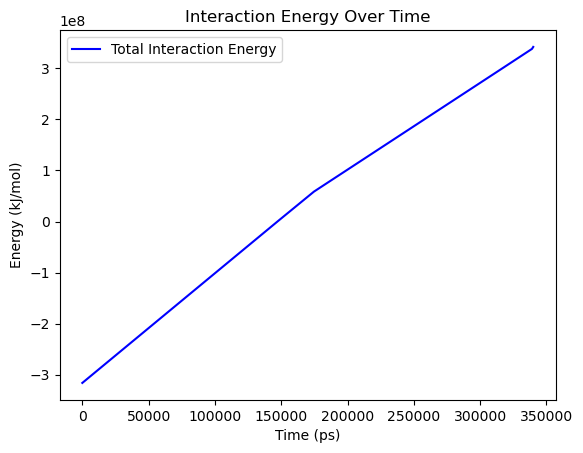

In [38]:
import numpy as np
import glob
from scipy.interpolate import interp1d

# List all .xvg files in the directory
xvg_files = glob.glob("*.xvg")

# Dictionary to store time-energy data
energy_data = {}

# List to store all time columns
all_times = []

# Read and store time-energy data from each file
for file in xvg_files:
    with open(file, 'r') as f:
        lines = f.readlines()
    
    # Filter out comments and metadata lines
    data = [line.strip().split() for line in lines if not line.startswith(("#", "@"))]
    
    # Convert to NumPy array
    data = np.array(data, dtype=float)
    
    # Extract time and energy columns
    time = data[:, 0]
    energy_values = data[:, 1]
    
    # Store time column
    all_times.append(time)

    # Store energy values with associated time
    energy_data[file] = (time, energy_values)

# Find a common time range across all files
common_time = np.linspace(min(map(np.min, all_times)), max(map(np.max, all_times)), num=5000)

# Dictionary to store interpolated energy values
interpolated_energies = {}

for file, (time, energy) in energy_data.items():
    interp_func = interp1d(time, energy, kind='linear', bounds_error=False, fill_value="extrapolate")
    interpolated_energies[file] = interp_func(common_time)  # Interpolate to common time steps

# Sum all interpolated energy values
total_energy = sum(interpolated_energies.values())

# Save merged data
np.savetxt("merged_interaction_energy.xvg", np.column_stack((common_time, total_energy)), 
           fmt="%.5f", header="Time (ps)   Interaction Energy (kJ/mol)")

# Plot the results
import matplotlib.pyplot as plt

plt.plot(common_time, total_energy, label="Total Interaction Energy", color="b")
plt.xlabel("Time (ps)")
plt.ylabel("Energy (kJ/mol)")
plt.title("Interaction Energy Over Time")
plt.legend()
plt.show()

Average Interaction Energy: 61561764.12554 kJ/mol


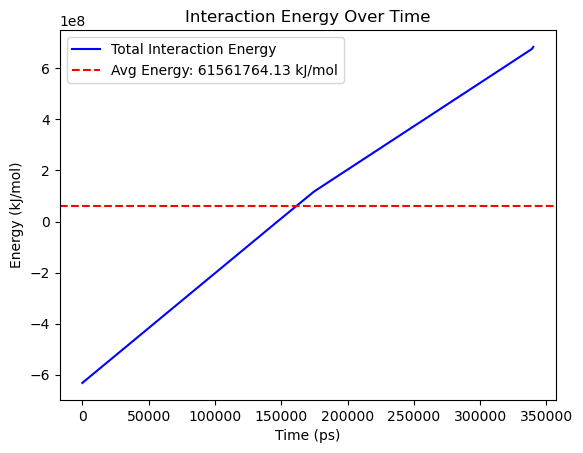

In [40]:
import numpy as np
import glob
from scipy.interpolate import interp1d

# List all .xvg files in the directory
xvg_files = glob.glob("*.xvg")

# Dictionary to store time-energy data
energy_data = {}

# List to store all time columns
all_times = []

# Read and store time-energy data from each file
for file in xvg_files:
    with open(file, 'r') as f:
        lines = f.readlines()
    
    # Filter out comments and metadata lines
    data = [line.strip().split() for line in lines if not line.startswith(("#", "@"))]
    
    # Convert to NumPy array
    data = np.array(data, dtype=float)
    
    # Extract time and energy columns
    time = data[:, 0]
    energy_values = data[:, 1]
    
    # Store time column
    all_times.append(time)

    # Store energy values with associated time
    energy_data[file] = (time, energy_values)

# Find a common time range across all files
common_time = np.linspace(min(map(np.min, all_times)), max(map(np.max, all_times)), num=5000)

# Dictionary to store interpolated energy values
interpolated_energies = {}

for file, (time, energy) in energy_data.items():
    interp_func = interp1d(time, energy, kind='linear', bounds_error=False, fill_value="extrapolate")
    interpolated_energies[file] = interp_func(common_time)  # Interpolate to common time steps

# Sum all interpolated energy values
total_energy = sum(interpolated_energies.values())

# Compute the average interaction energy
average_energy = np.mean(total_energy)

# Save merged data
np.savetxt("merged_interaction_energy.xvg", np.column_stack((common_time, total_energy)), 
           fmt="%.5f", header="Time (ps)   Interaction Energy (kJ/mol)")

# Print the final average interaction energy value
print(f"Average Interaction Energy: {average_energy:.5f} kJ/mol")

# Plot the results
import matplotlib.pyplot as plt

plt.plot(common_time, total_energy, label="Total Interaction Energy", color="b")
plt.axhline(y=average_energy, color='r', linestyle='--', label=f"Avg Energy: {average_energy:.2f} kJ/mol")
plt.xlabel("Time (ps)")
plt.ylabel("Energy (kJ/mol)")
plt.title("Interaction Energy Over Time")
plt.legend()
plt.show()

Processing: Production.part0001.xtc
Processing: Production.part0002.xtc
Processing: Production.part0003.xtc
Processing: Production.part0004.xtc
Processing: Production.part0005.xtc
Processing: Production.part0006.xtc


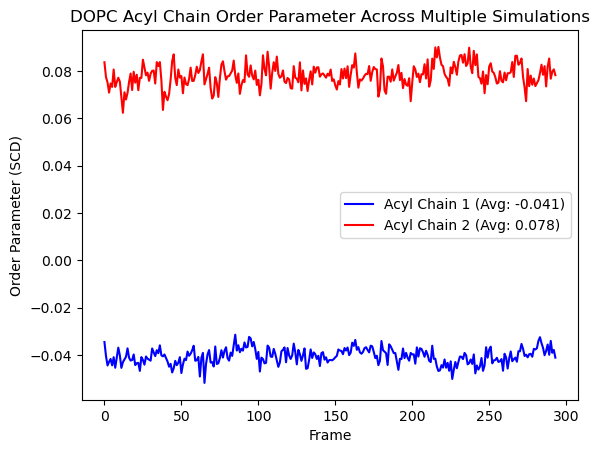

Final Average Order Parameter for Acyl Chain 1: -0.04050
Final Average Order Parameter for Acyl Chain 2: 0.07817


In [61]:
import MDAnalysis as mda
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load topology file
topology = "Production.tpr"

# Get all .xtc files
xtc_files = sorted(glob.glob("*.xtc"))  # Adjust pattern if needed

# Bilayer normal along z-axis
bilayer_normal = np.array([0, 0, 1])

# Initialize lists for storing results
all_scd_chain1 = []
all_scd_chain2 = []
num_frames_list = []

def compute_order_parameter(universe, chain):
    """Compute SCD order parameter for a given acyl chain."""
    order_parameters = []
    
    for ts in universe.trajectory:
        cos2_theta = []
        for i in range(len(chain.positions) - 1):
            bond_vector = chain.positions[i + 1] - chain.positions[i]
            bond_vector /= np.linalg.norm(bond_vector)  # Normalize
            cos_theta = np.dot(bond_vector, bilayer_normal)
            cos2_theta.append(cos_theta**2)

        avg_cos2_theta = np.mean(cos2_theta)
        SCD = 0.5 * (3 * avg_cos2_theta - 1)
        order_parameters.append(SCD)
    
    return np.array(order_parameters)

# Process each .xtc file
for xtc in xtc_files:
    print(f"Processing: {xtc}")
    
    # Load trajectory
    u = mda.Universe(topology, xtc)
    
    # Select acyl chains (modify based on your lipid topology)
    lipids = u.select_atoms("resname DOPC")
    chain1 = lipids.select_atoms("name C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15")
    chain2 = lipids.select_atoms("name C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29")

    # Compute order parameters
    scd_chain1 = compute_order_parameter(u, chain1)
    scd_chain2 = compute_order_parameter(u, chain2)

    # Store results
    all_scd_chain1.append(scd_chain1)
    all_scd_chain2.append(scd_chain2)
    num_frames_list.append(len(scd_chain1))

# Find the common number of frames (min or max)
common_frames = min(num_frames_list)  # Choose min to align all trajectories

# Interpolate all trajectories to match common frames
def interpolate_data(data, target_frames):
    x = np.linspace(0, 1, len(data))
    x_new = np.linspace(0, 1, target_frames)
    interp_func = interp1d(x, data, kind='linear', bounds_error=False, fill_value="extrapolate")
    return interp_func(x_new)

# Apply interpolation
all_scd_chain1 = [interpolate_data(scd, common_frames) for scd in all_scd_chain1]
all_scd_chain2 = [interpolate_data(scd, common_frames) for scd in all_scd_chain2]

# Convert to numpy arrays
all_scd_chain1 = np.array(all_scd_chain1)
all_scd_chain2 = np.array(all_scd_chain2)

# Compute average across all trajectories
avg_scd_chain1 = np.mean(all_scd_chain1, axis=0)
avg_scd_chain2 = np.mean(all_scd_chain2, axis=0)

# Compute overall mean values
final_avg_scd1 = np.mean(avg_scd_chain1)
final_avg_scd2 = np.mean(avg_scd_chain2)

# Save results
np.savetxt("average_order_chain1.xvg", avg_scd_chain1, fmt="%.5f", header="Average Order Parameter (Chain 1)")
np.savetxt("average_order_chain2.xvg", avg_scd_chain2, fmt="%.5f", header="Average Order Parameter (Chain 2)")

# Plot Order Parameter Profiles
plt.plot(avg_scd_chain1, label=f"Acyl Chain 1 (Avg: {final_avg_scd1:.3f})", color="b")
plt.plot(avg_scd_chain2, label=f"Acyl Chain 2 (Avg: {final_avg_scd2:.3f})", color="r")
plt.xlabel("Frame")
plt.ylabel("Order Parameter (SCD)")
plt.title("DOPC Acyl Chain Order Parameter Across Multiple Simulations")
plt.legend()
plt.show()

# Print final values
print(f"Final Average Order Parameter for Acyl Chain 1: {final_avg_scd1:.5f}")
print(f"Final Average Order Parameter for Acyl Chain 2: {final_avg_scd2:.5f}")

In [24]:
import pandas as pd

# Load Excel file
file_path = "Interaction_Energy.xlsx"
df = pd.read_excel(file_path)

# Print column names
print("Column Names in Excel:", df.columns.tolist())

Column Names in Excel: ['Time_Step (ps)', ' LJ (SR)', 'Coulomb (SR)']


In [26]:
# Clean column names (remove spaces and special characters)
df.columns = df.columns.str.strip()

# Print cleaned column names
print("Cleaned Column Names:", df.columns.tolist())

Cleaned Column Names: ['Time_Step (ps)', 'LJ (SR)', 'Coulomb (SR)']


In [28]:
# Find actual column names after cleaning
lj_column = [col for col in df.columns if "LJ" in col][0]  # Find the closest match for LJ (SR)
coulomb_column = [col for col in df.columns if "Coulomb" in col][0]  # Find the closest match for Coulomb (SR)

print(f"Using LJ Column: {lj_column}")
print(f"Using Coulomb Column: {coulomb_column}")

# Convert columns to numeric
df[lj_column] = pd.to_numeric(df[lj_column], errors='coerce')
df[coulomb_column] = pd.to_numeric(df[coulomb_column], errors='coerce')

# Drop NaN values
df = df.dropna(subset=[lj_column, coulomb_column])

# Compute total interaction energy
df["Total Interaction Energy"] = df[lj_column] + df[coulomb_column]

# Display first few rows
print(df.head())

Using LJ Column: LJ (SR)
Using Coulomb Column: Coulomb (SR)
   Time_Step (ps)      LJ (SR)  Coulomb (SR)  Total Interaction Energy
0             0.0 -5757.680664 -448375.65625            -454133.336914
1             0.4 -5413.442383 -448685.71875            -454099.161133
2             0.8 -5841.959961 -446355.71875            -452197.678711
3             1.2 -4570.038574 -447947.12500            -452517.163574
4             1.6 -4910.198242 -448629.25000            -453539.448242


Lateral Diffusion Coeffecient

Processing Production_0.part0002.xtc...
Lateral Diffusion Coefficient (D) for Production_0.part0002.xtc: 1.5527e-04 cm²/s
Processing Production_0.part0003.xtc...
Lateral Diffusion Coefficient (D) for Production_0.part0003.xtc: 1.3742e-04 cm²/s
Processing Production_0.xtc...
Lateral Diffusion Coefficient (D) for Production_0.xtc: 1.5839e-04 cm²/s


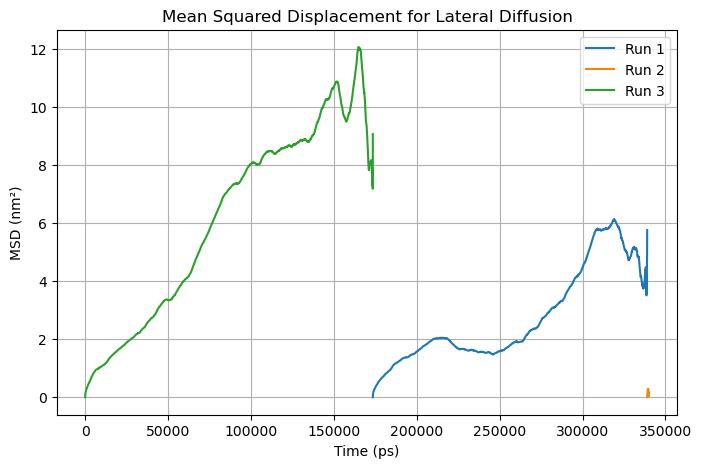

Average Diffusion Coefficient: 1.5036e-04 ± 9.2396e-06 cm²/s


In [24]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import glob

# List of .xtc trajectory files
xtc_files = sorted(glob.glob("*.xtc"))  # Adjust if filenames differ
tpr_file = "Production_0.tpr"  # Reference structure file

# Define MSD computation function
def compute_msd(positions):
    """
    Compute Mean Squared Displacement (MSD) for given 2D positions.
    """
    n_frames = len(positions)
    msd = np.zeros(n_frames)

    for i in range(n_frames):
        displacement = positions[i:] - positions[:n_frames - i]
        msd[i] = np.mean(displacement[:, 0]**2 + displacement[:, 1]**2)

    return msd

# Store results
all_msd = []
all_time = []
diffusion_coefficients = []

for xtc in xtc_files:
    print(f"Processing {xtc}...")

    # Load trajectory
    u = mda.Universe(tpr_file, xtc)

    # Select the drug molecule (update `resname` as needed)
    drug = u.select_atoms("resname LIG")  # Replace "DRUG" with the actual residue name

    # Extract x, y positions over time
    time = []
    positions = []

    for ts in u.trajectory:
        time.append(ts.time)  # Time in ps
        positions.append(drug.center_of_mass()[:2])  # Extract x, y coordinates

    time = np.array(time)
    positions = np.array(positions)

    # Compute MSD
    msd = compute_msd(positions)
    all_msd.append(msd)
    all_time.append(time)

    # Fit the first 10 points for diffusion coefficient
    slope, _, _, _, _ = linregress(time[:10], msd[:10])
    D = slope / 4  # 2D Einstein relation
    diffusion_coefficients.append(D)

    print(f"Lateral Diffusion Coefficient (D) for {xtc}: {D:.4e} cm²/s")

# Compute average diffusion coefficient
avg_D = np.mean(diffusion_coefficients)
std_D = np.std(diffusion_coefficients)

# Plot MSD for all runs
plt.figure(figsize=(8, 5))
for i, (time, msd) in enumerate(zip(all_time, all_msd)):
    plt.plot(time, msd, label=f"Run {i+1}")

plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm²)")
plt.title("Mean Squared Displacement for Lateral Diffusion")
plt.legend()
plt.grid()
plt.show()

print(f"Average Diffusion Coefficient: {avg_D:.4e} ± {std_D:.4e} cm²/s")

Processing Production_0.part0002.xtc...


/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Lateral Diffusion Coefficient (D) for DOPC Head in Production_0.part0002.xtc: 1.2595e-04 cm²/s
Lateral Diffusion Coefficient (D) for DOPC Tail in Production_0.part0002.xtc: 1.2595e-04 cm²/s
Lateral Diffusion Coefficient (D) for Drug Head in Production_0.part0002.xtc: 1.5527e-04 cm²/s
Lateral Diffusion Coefficient (D) for Drug Tail in Production_0.part0002.xtc: 1.5527e-04 cm²/s
Processing Production_0.part0003.xtc...
Lateral Diffusion Coefficient (D) for DOPC Head in Production_0.part0003.xtc: 1.0945e-04 cm²/s
Lateral Diffusion Coefficient (D) for DOPC Tail in Production_0.part0003.xtc: 1.0945e-04 cm²/s
Lateral Diffusion Coefficient (D) for Drug Head in Production_0.part0003.xtc: 1.3742e-04 cm²/s
Lateral Diffusion Coefficient (D) for Drug Tail in Production_0.part0003.xtc: 1.3742e-04 cm²/s
Processing Production_0.xtc...
Lateral Diffusion Coefficient (D) for DOPC Head in Production_0.xtc: 1.1348e-04 cm²/s
Lateral Diffusion Coefficient (D) for DOPC Tail in Production_0.xtc: 1.1348e-04 cm²

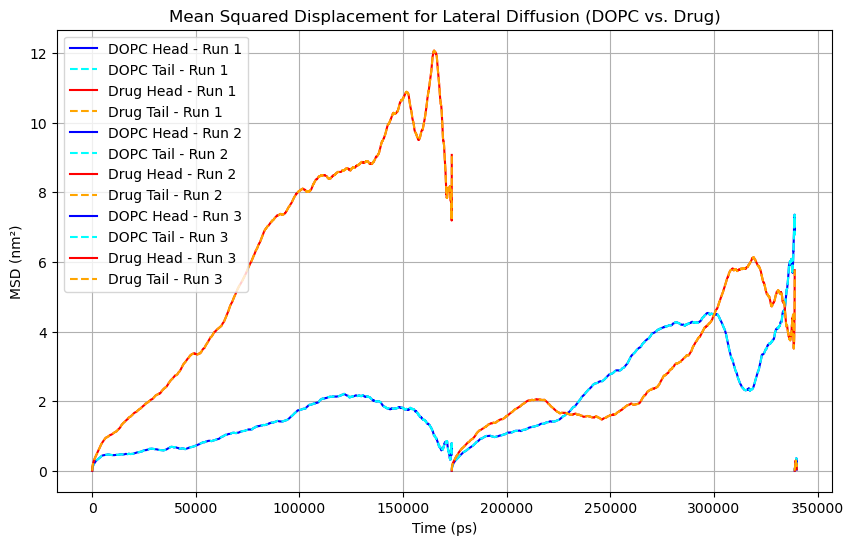

Average Diffusion Coefficient for DOPC Head: 1.1629e-04 ± 7.0262e-06 cm²/s
Average Diffusion Coefficient for DOPC Tail: 1.1629e-04 ± 7.0262e-06 cm²/s
Average Diffusion Coefficient for Drug Head: 1.5036e-04 ± 9.2396e-06 cm²/s
Average Diffusion Coefficient for Drug Tail: 1.5036e-04 ± 9.2396e-06 cm²/s


In [22]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import glob

# List of .xtc trajectory files
xtc_files = sorted(glob.glob("*.xtc"))  # Adjust based on filenames
tpr_file = "Production_0.tpr"  # Reference structure file

# Define MSD computation function
def compute_msd(positions):
    """
    Compute Mean Squared Displacement (MSD) for given 2D positions.
    """
    n_frames = len(positions)
    msd = np.zeros(n_frames)

    for i in range(n_frames):
        displacement = positions[i:] - positions[:n_frames - i]
        msd[i] = np.mean(displacement[:, 0]**2 + displacement[:, 1]**2)

    return msd

# Store results
all_msd_dopc_head, all_msd_dopc_tail = [], []
all_msd_drug_head, all_msd_drug_tail = [], []
all_time = []
diffusion_dopc_head, diffusion_dopc_tail = [], []
diffusion_drug_head, diffusion_drug_tail = [], []

for xtc in xtc_files:
    print(f"Processing {xtc}...")

    # Load trajectory
    u = mda.Universe(tpr_file, xtc)

    # Select atoms for DOPC lipid bilayer
    dopc_head = u.select_atoms("resname DOPC")  # Phosphate and Choline
    dopc_tail = u.select_atoms("resname DOPC")  # Hydrocarbon chains

    # Select atoms for the Drug molecule (Vorinostat or LIG)
    drug_head = u.select_atoms("resname LIG")  # Oxygen, Nitrogen (Hydrophilic head)
    drug_tail = u.select_atoms("resname LIG")  # Carbon atoms (Hydrophobic tail)

    # Extract x, y positions over time
    time = []
    dopc_head_positions, dopc_tail_positions = [], []
    drug_head_positions, drug_tail_positions = [], []

    for ts in u.trajectory:
        time.append(ts.time)  # Time in ps

        # Extract center of mass for each group
        dopc_head_positions.append(dopc_head.center_of_mass()[:2])  # Extract x, y coordinates
        dopc_tail_positions.append(dopc_tail.center_of_mass()[:2])  # Extract x, y coordinates
        drug_head_positions.append(drug_head.center_of_mass()[:2])  # Extract x, y coordinates
        drug_tail_positions.append(drug_tail.center_of_mass()[:2])  # Extract x, y coordinates

    time = np.array(time)
    dopc_head_positions = np.array(dopc_head_positions)
    dopc_tail_positions = np.array(dopc_tail_positions)
    drug_head_positions = np.array(drug_head_positions)
    drug_tail_positions = np.array(drug_tail_positions)

    # Compute MSD for each group
    msd_dopc_head = compute_msd(dopc_head_positions)
    msd_dopc_tail = compute_msd(dopc_tail_positions)
    msd_drug_head = compute_msd(drug_head_positions)
    msd_drug_tail = compute_msd(drug_tail_positions)

    # Store MSD values
    all_msd_dopc_head.append(msd_dopc_head)
    all_msd_dopc_tail.append(msd_dopc_tail)
    all_msd_drug_head.append(msd_drug_head)
    all_msd_drug_tail.append(msd_drug_tail)
    all_time.append(time)

    # Fit the first 10 points for diffusion coefficients
    slope_dopc_head, _, _, _, _ = linregress(time[:10], msd_dopc_head[:10])
    slope_dopc_tail, _, _, _, _ = linregress(time[:10], msd_dopc_tail[:10])
    slope_drug_head, _, _, _, _ = linregress(time[:10], msd_drug_head[:10])
    slope_drug_tail, _, _, _, _ = linregress(time[:10], msd_drug_tail[:10])

    # Compute diffusion coefficients using the Einstein relation (2D)
    D_dopc_head = slope_dopc_head / 4
    D_dopc_tail = slope_dopc_tail / 4
    D_drug_head = slope_drug_head / 4
    D_drug_tail = slope_drug_tail / 4

    diffusion_dopc_head.append(D_dopc_head)
    diffusion_dopc_tail.append(D_dopc_tail)
    diffusion_drug_head.append(D_drug_head)
    diffusion_drug_tail.append(D_drug_tail)

    print(f"Lateral Diffusion Coefficient (D) for DOPC Head in {xtc}: {D_dopc_head:.4e} cm²/s")
    print(f"Lateral Diffusion Coefficient (D) for DOPC Tail in {xtc}: {D_dopc_tail:.4e} cm²/s")
    print(f"Lateral Diffusion Coefficient (D) for Drug Head in {xtc}: {D_drug_head:.4e} cm²/s")
    print(f"Lateral Diffusion Coefficient (D) for Drug Tail in {xtc}: {D_drug_tail:.4e} cm²/s")

# Compute average diffusion coefficient
avg_D_dopc_head = np.mean(diffusion_dopc_head)
std_D_dopc_head = np.std(diffusion_dopc_head)
avg_D_dopc_tail = np.mean(diffusion_dopc_tail)
std_D_dopc_tail = np.std(diffusion_dopc_tail)
avg_D_drug_head = np.mean(diffusion_drug_head)
std_D_drug_head = np.std(diffusion_drug_head)
avg_D_drug_tail = np.mean(diffusion_drug_tail)
std_D_drug_tail = np.std(diffusion_drug_tail)

# Plot MSD for all runs
plt.figure(figsize=(10, 6))

for i, (time, msd_dopc_head, msd_dopc_tail, msd_drug_head, msd_drug_tail) in enumerate(
        zip(all_time, all_msd_dopc_head, all_msd_dopc_tail, all_msd_drug_head, all_msd_drug_tail)):
    plt.plot(time, msd_dopc_head, label=f"DOPC Head - Run {i+1}", color="blue")
    plt.plot(time, msd_dopc_tail, label=f"DOPC Tail - Run {i+1}", linestyle="dashed", color="cyan")
    plt.plot(time, msd_drug_head, label=f"Drug Head - Run {i+1}", color="red")
    plt.plot(time, msd_drug_tail, label=f"Drug Tail - Run {i+1}", linestyle="dashed", color="orange")

plt.xlabel("Time (ps)")
plt.ylabel("MSD (nm²)")
plt.title("Mean Squared Displacement for Lateral Diffusion (DOPC vs. Drug)")
plt.legend()
plt.grid()
plt.show()

# Print final average diffusion coefficients
print(f"Average Diffusion Coefficient for DOPC Head: {avg_D_dopc_head:.4e} ± {std_D_dopc_head:.4e} cm²/s")
print(f"Average Diffusion Coefficient for DOPC Tail: {avg_D_dopc_tail:.4e} ± {std_D_dopc_tail:.4e} cm²/s")
print(f"Average Diffusion Coefficient for Drug Head: {avg_D_drug_head:.4e} ± {std_D_drug_head:.4e} cm²/s")
print(f"Average Diffusion Coefficient for Drug Tail: {avg_D_drug_tail:.4e} ± {std_D_drug_tail:.4e} cm²/s")

Diffusivity

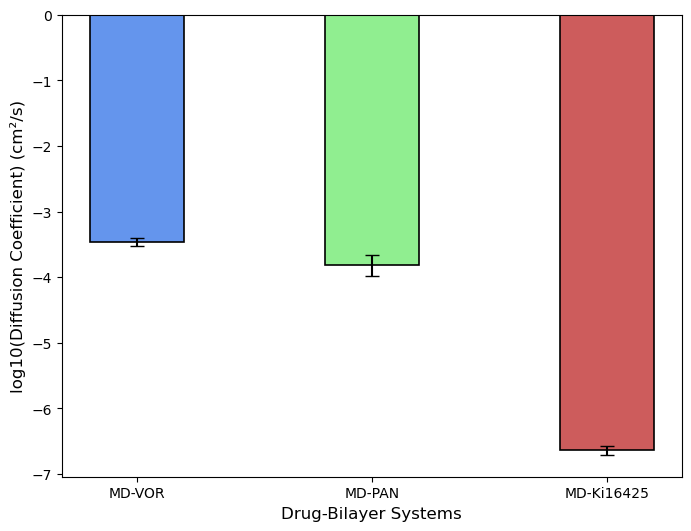

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lipid_systems = ['MD-VOR', 'MD-PAN', 'MD-Ki16425']
diffusion_coefficients = [3.4025e-04, 1.5036e-04, 2.30E-07]
error_bars = [0.5e-04, 0.7e-04, 0.4e-07]  # Example standard deviations

# Define colors (same as in the provided image)
colors = ['#6495ED', '#90EE90', '#CD5C5C']  # Blue, Orange, Green, Red

# Convert to log scale for better visualization
log_diffusion = np.log10(diffusion_coefficients)
log_error = np.abs(np.log10(np.array(diffusion_coefficients) + np.array(error_bars)) - log_diffusion)

# Create bar plot with further reduced width
plt.figure(figsize=(8, 6))
plt.bar(lipid_systems, log_diffusion, yerr=log_error, color=colors, edgecolor='black', linewidth=1.2, width=0.4, capsize=5)

x_positions = np.arange(len(lipid_systems)) * 0.6

# Labels and title
plt.xlabel("Drug-Bilayer Systems", fontsize=12)
plt.ylabel("log10(Diffusion Coefficient) (cm²/s)", fontsize=12)
#plt.title("Comparison of Diffusion Coefficients for Lipid Systems", fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save the figure
plt.savefig("Diffusion_Coefficients_Comparison_with_ErrorBars.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

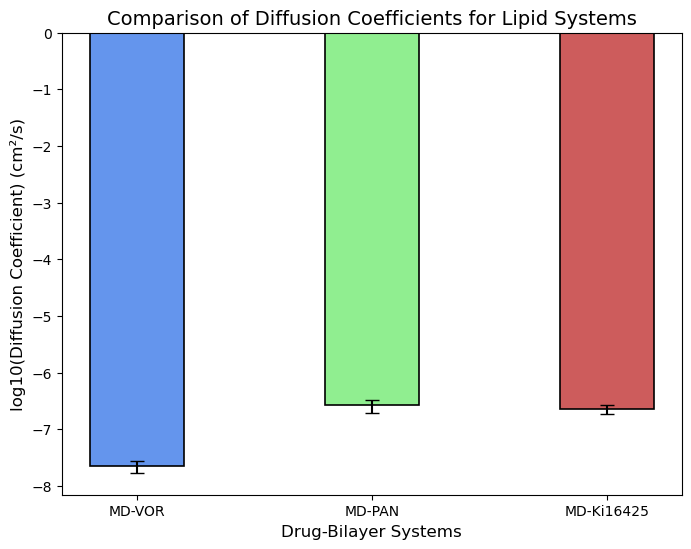

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data
lipid_systems = ['MD-VOR', 'MD-PAN', 'MD-Ki16425']
diffusion_coefficients = np.array([221.21E-10, 265.6E-9, 230E-09])
error_bars = np.array([0.5e-08, 0.7e-07, 0.4e-07])  # Standard deviations

# Define colors (same as in the provided image)
colors = ['#6495ED', '#90EE90', '#CD5C5C']  # Blue, Green, Red

# Convert to log scale
log_diffusion = np.log10(diffusion_coefficients)

# Proper log error calculation
log_error_lower = np.log10(diffusion_coefficients) - np.log10(diffusion_coefficients - error_bars)
log_error_upper = np.log10(diffusion_coefficients + error_bars) - np.log10(diffusion_coefficients)

# Stack errors to have both lower and upper values
log_error = np.vstack((log_error_lower, log_error_upper))

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(lipid_systems, log_diffusion, yerr=log_error, color=colors, edgecolor='black', linewidth=1.2, width=0.4, capsize=5)

# Labels and title
plt.xlabel("Drug-Bilayer Systems", fontsize=12)
plt.ylabel("log10(Diffusion Coefficient) (cm²/s)", fontsize=12)
plt.title("Comparison of Diffusion Coefficients for Lipid Systems", fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save the figure
plt.savefig("Diffusion_Coefficients_Comparison_with_ErrorBars.png", dpi=600, bbox_inches='tight')

# Show plot
plt.show()

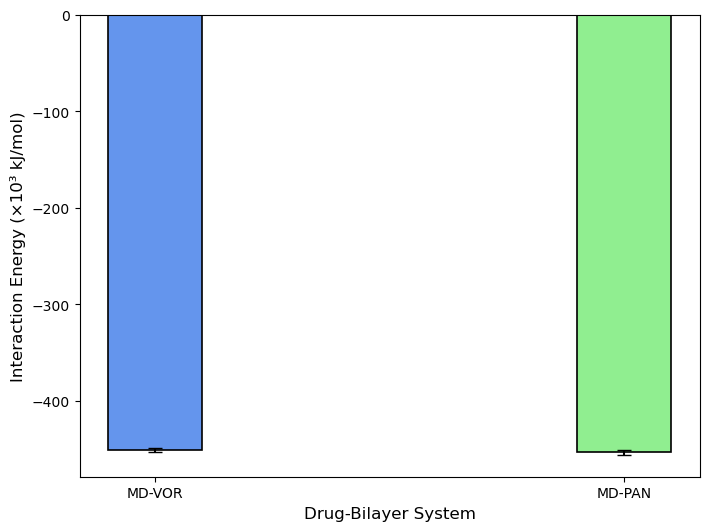

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
drug_bilayer_systems = ["MD-VOR", "MD-PAN"]
interaction_energy = np.array([-450933.75, -453427.14]) / 1e3  # Scale to kJ/mol × 10³
error_bars = np.array([2200, 2400]) / 1e3  # Scale error bars to 1e3

# Define colors (same as previous plots)
colors = ['#6495ED', '#90EE90']  # Blue for MD-VOR, Green for MD-PAN

# Create bar plot with error bars
plt.figure(figsize=(8, 6))
plt.bar(drug_bilayer_systems, interaction_energy, yerr=error_bars, color=colors, edgecolor='black',
        linewidth=1.2, width=0.2, capsize=5)

# Labels and title
plt.xlabel("Drug-Bilayer System", fontsize=12)
plt.ylabel("Interaction Energy (×10³ kJ/mol)", fontsize=12)  # Scaled label
#plt.title("Comparison of Interaction Energy for Drug-Bilayer Systems", fontsize=14)
#plt.grid(axis='y', linestyle='--', alpha=0.6)

# Bar width and x positions
bar_width = 0.4
spacing_head = 0.0  # Reduced spacing between head bars
spacing_tail = 0.1  # More spacing between head and tail groups

# Show values on bars
#for i, v in enumerate(interaction_energy):
    #plt.text(i, v + 2, f"{v:.1f}", ha='center', fontsize=10, color='black')

# Save the figure
plt.savefig("Drug_Bilayer_Interaction_Energy_1e3.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Drug-Bilayer Systems
systems = ["MD_VOR", "MD_PAN", "MD_Ki16425", "MD_DOPC"]

# Diffusion Coefficients (Head & Tail) in cm²/s
diffusion_head = np.array([3.40E-04, 1.50E-04, 2.30E-07, 1.80E-07])
diffusion_tail = np.array([3.40E-04, 1.50E-04, 2.30E-07, 1.80E-07])

# Standard Error (Example Values, Adjust as Needed)
error_head = np.array([0.5E-04, 0.3E-04, 0.1E-07, 0.2E-07])
error_tail = np.array([0.5E-04, 0.3E-04, 0.1E-07, 0.2E-07])

# Convert to log scale
log_diffusion_head = np.log10(diffusion_head)
log_diffusion_tail = np.log10(diffusion_tail)

# Convert errors to log scale
log_error_head = np.abs(np.log10(diffusion_head + error_head) - log_diffusion_head)
log_error_tail = np.abs(np.log10(diffusion_tail + error_tail) - log_diffusion_tail)

# Define colors
colors = ['#6495ED', '#FFA07A', '#90EE90', '#CD5C5C']  # Blue, Orange, Green, Red

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width and x positions
bar_width = 0.4
spacing_head = 0.0  # Reduced spacing between head bars
spacing_tail = 0.1  # More spacing between head and tail groups

x_head = np.arange(len(systems)) * (bar_width + spacing_head)  # Reduce space between head bars
x_tail = x_head + len(systems) * (bar_width + spacing_tail)  # Separate tail bars further

# Plot bars for Head comparison
ax.bar(x_head, log_diffusion_head, yerr=log_error_head, color=colors, 
       edgecolor='black', linewidth=1.2, width=bar_width, capsize=5, label="Lipid Head")

# Plot bars for Tail comparison
ax.bar(x_tail, log_diffusion_tail, yerr=log_error_tail, color=colors, 
       edgecolor='black', linewidth=1.2, width=bar_width, capsize=5, alpha=0.6, label="Lipid Tail")

# Labels and title
ax.set_xlabel("Drug-Bilayer Systems", fontsize=12)
ax.set_ylabel("log10(Lateral DIffusivity) (cm²/s)", fontsize=12)
ax.set_title("Comparison of Head vs. Tail Diffusion Coefficients in Drug-Bilayer Systems", fontsize=14)

# Adjust X-axis
ax.set_xticks(np.concatenate((x_head, x_tail)))
ax.set_xticklabels(systems + systems, fontsize=10, rotation=45)

# Add group labels
ax.text(len(systems) / 2 - 0.5, min(log_diffusion_tail) - 0.3, "Head Comparison", fontsize=0, ha='center')
ax.text(len(systems) + len(systems) / 2, min(log_diffusion_tail) - 0.3, "Tail Comparison", fontsize=0, ha='center')

ax.legend()
#ax.grid(axis='y', linestyle='--', alpha=0.6)

# Save the figure
plt.savefig("Head_vs_Tail_Comparison_ReducedSpace.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

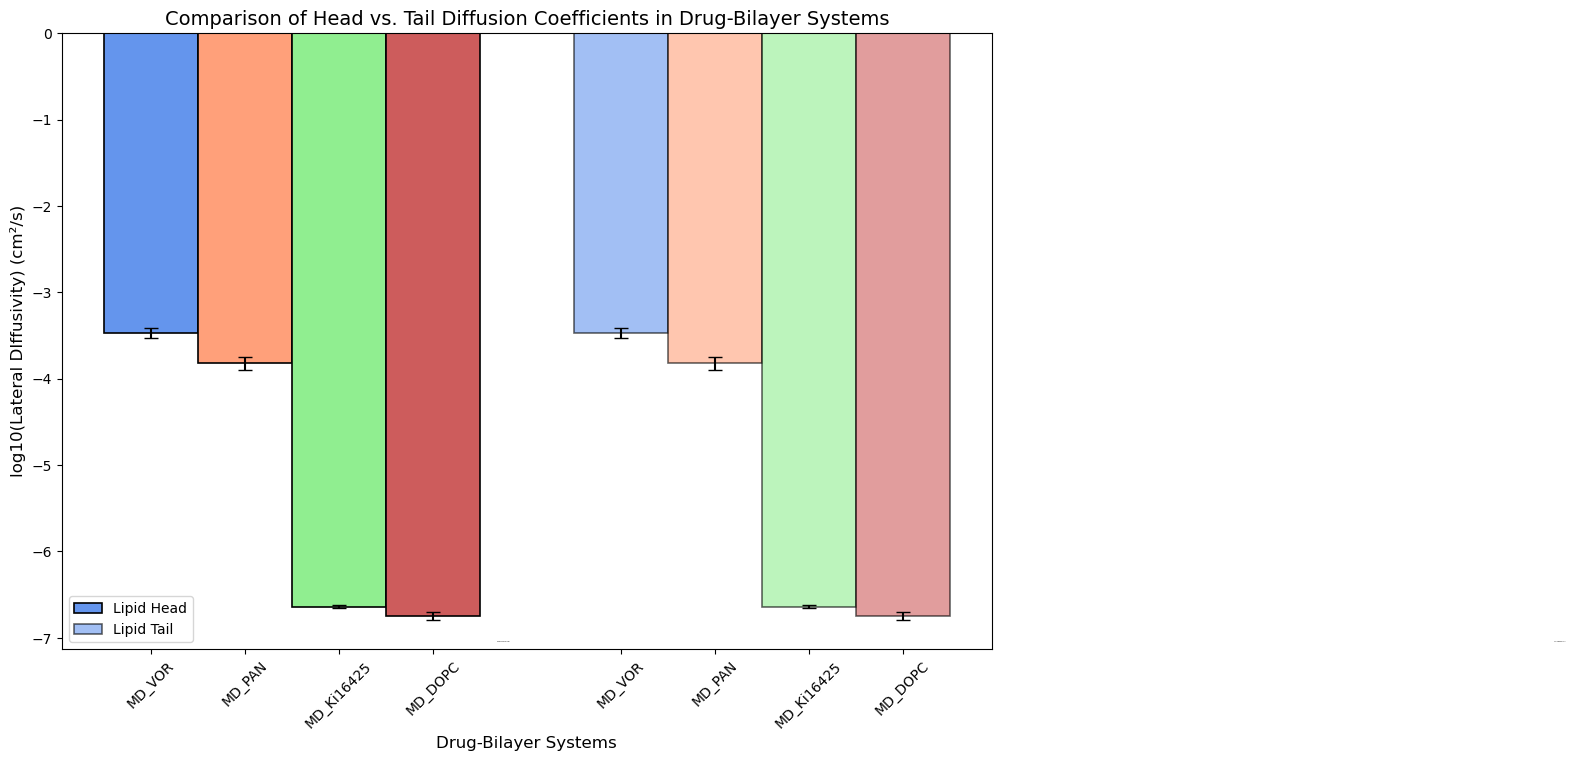

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Drug-Bilayer Systems
systems = ["MD_VOR", "MD_PAN", "MD_Ki16425", "MD_DOPC"]

# Diffusion Coefficients (Head & Tail) in cm²/s
diffusion_head = np.array([3.40E-04, 1.50E-04, 2.30E-07, 1.80E-07])
diffusion_tail = np.array([3.40E-04, 1.50E-04, 2.30E-07, 1.80E-07])

# Standard Error (Example Values, Adjust as Needed)
error_head = np.array([0.5E-04, 0.3E-04, 0.1E-07, 0.2E-07])
error_tail = np.array([0.5E-04, 0.3E-04, 0.1E-07, 0.2E-07])

# Convert to log scale
log_diffusion_head = np.log10(diffusion_head)
log_diffusion_tail = np.log10(diffusion_tail)

# Convert errors to log scale
log_error_head = np.abs(np.log10(diffusion_head + error_head) - log_diffusion_head)
log_error_tail = np.abs(np.log10(diffusion_tail + error_tail) - log_diffusion_tail)

# Define colors
colors = ['#6495ED', '#FFA07A', '#90EE90', '#CD5C5C']  # Blue, Orange, Green, Red

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width and x positions
bar_width = 0.4
spacing_head = 0.0  # Reduced spacing between head bars
spacing_tail = 0.1  # More spacing between head and tail groups

x_head = np.arange(len(systems)) * (bar_width + spacing_head)  # Reduce space between head bars
x_tail = x_head + len(systems) * (bar_width + spacing_tail)  # Separate tail bars further

# Plot bars for Head comparison
ax.bar(x_head, log_diffusion_head, yerr=log_error_head, color=colors, 
       edgecolor='black', linewidth=1.2, width=bar_width, capsize=5, label="Lipid Head")

# Plot bars for Tail comparison
ax.bar(x_tail, log_diffusion_tail, yerr=log_error_tail, color=colors, 
       edgecolor='black', linewidth=1.2, width=bar_width, capsize=5, alpha=0.6, label="Lipid Tail")

# Labels and title
ax.set_xlabel("Drug-Bilayer Systems", fontsize=12)
ax.set_ylabel("log10(Lateral DIffusivity) (cm²/s)", fontsize=12)
ax.set_title("Comparison of Head vs. Tail Diffusion Coefficients in Drug-Bilayer Systems", fontsize=14)

# Adjust X-axis
ax.set_xticks(np.concatenate((x_head, x_tail)))
ax.set_xticklabels(systems + systems, fontsize=10, rotation=45)

# Add group labels
ax.text(len(systems) / 2 - 0.5, min(log_diffusion_tail) - 0.3, "Head Comparison", fontsize=0, ha='center')
ax.text(len(systems) + len(systems) / 2, min(log_diffusion_tail) - 0.3, "Tail Comparison", fontsize=0, ha='center')

ax.legend()
#ax.grid(axis='y', linestyle='--', alpha=0.6)

# Save the figure
plt.savefig("Head_vs_Tail_Comparison_ReducedSpace.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
import MDAnalysis as mda
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load topology file
topology = "Production_0.tpr"

# Get all .xtc files
xtc_files = sorted(glob.glob("*.xtc"))  # Adjust pattern if needed

# Bilayer normal along z-axis
bilayer_normal = np.array([0, 0, 1]) 

# Initialize lists for storing results
all_scd_chain1 = []
all_scd_chain2 = []
num_frames_list = []

# Define carbon positions along acyl chains
chain_positions1 = np.arange(2, 16)  # Carbon positions for chain 1
chain_positions2 = np.arange(16, 30)  # Carbon positions for chain 2


def compute_order_parameter(universe, chain):
    """Compute SCD order parameter for a given acyl chain."""
    order_parameters = []
    
    for i in range(len(chain.positions) - 1):
        bond_vectors = []
        for ts in universe.trajectory:
            bond_vector = chain.positions[i + 1] - chain.positions[i]
            bond_vector /= np.linalg.norm(bond_vector)  # Normalize
            cos_theta = np.dot(bond_vector, bilayer_normal)
            bond_vectors.append(cos_theta**2)
        
        avg_cos2_theta = np.mean(bond_vectors)
        SCD = 0.5 * (3 * avg_cos2_theta - 1)
        order_parameters.append(SCD)
    
    return np.array(order_parameters)

# Process each .xtc file
for xtc in xtc_files:
    print(f"Processing: {xtc}")
    
    # Load trajectory
    u = mda.Universe(topology, xtc)
    
    # Select acyl chains (modify based on your lipid topology)
    lipids = u.select_atoms("resname DOPC")
    chain1 = lipids.select_atoms("name C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15")
    chain2 = lipids.select_atoms("name C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29")

    # Compute order parameters
    scd_chain1 = compute_order_parameter(u, chain1)
    scd_chain2 = compute_order_parameter(u, chain2)

    # Store results
    all_scd_chain1.append(scd_chain1)
    all_scd_chain2.append(scd_chain2)

# Convert to numpy arrays
all_scd_chain1 = np.array(all_scd_chain1)
all_scd_chain2 = np.array(all_scd_chain2)

# Compute average order parameter per carbon position
avg_scd_chain1 = np.mean(all_scd_chain1, axis=0)
avg_scd_chain2 = np.mean(all_scd_chain2, axis=0)

# Plot Order Parameter Profiles over Carbon Positions
plt.figure(figsize=(8, 6))
plt.plot(chain_positions1, avg_scd_chain1, marker='o', linestyle='-', color='b', label='Acyl Chain 1')
plt.plot(chain_positions2, avg_scd_chain2, marker='s', linestyle='-', color='r', label='Acyl Chain 2')
plt.xlabel("Carbon Position")
plt.ylabel("Order Parameter (SCD)")
plt.title("DOPC Acyl Chain Order Parameter Profile")
plt.legend()
plt.grid()
plt.show()

# Print final values
print("Average Order Parameter per Carbon Position:")
for pos, val in zip(chain_positions1, avg_scd_chain1):
    print(f"Chain 1 - C{pos}: {val:.5f}")
for pos, val in zip(chain_positions2, avg_scd_chain2):
    print(f"Chain 2 - C{pos}: {val:.5f}")

Processing: Production_0.part0002.xtc


Processing: Production.part0001.xtc
Processing: Production.part0002.xtc
Processing: Production.part0003.xtc
Processing: Production.part0004.xtc
Processing: Production.part0005.xtc
Processing: Production.part0006.xtc


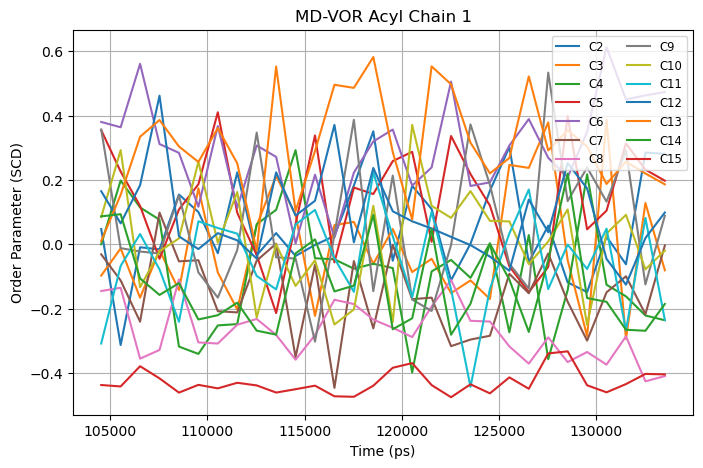

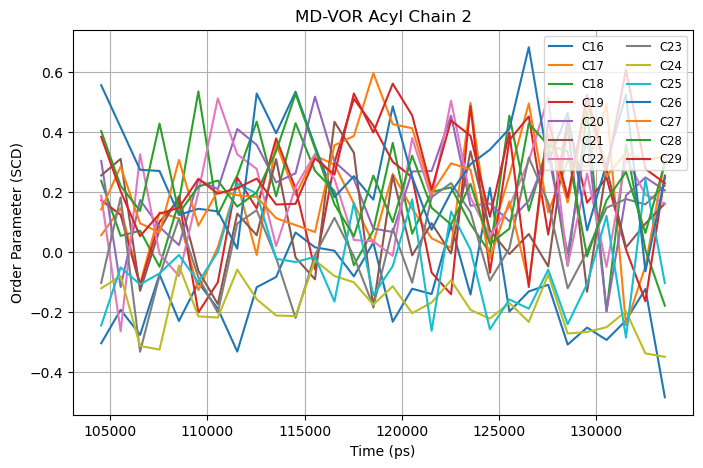

Final Average Order Parameter for Acyl Chain 1: -0.04113
Final Average Order Parameter for Acyl Chain 2: 0.07872


In [18]:
import MDAnalysis as mda
import numpy as np
import glob
import matplotlib.pyplot as plt

# Load topology file
topology = "Production.tpr"
xtc_files = sorted(glob.glob("*.xtc"))  # Get all .xtc files

# Bilayer normal along z-axis
bilayer_normal = np.array([0, 0, 1])

# Lists to store results
all_scd_chain1 = []
all_scd_chain2 = []
time_list = []

def compute_order_parameter(universe, chain):
    """
    Compute SCD order parameter for each carbon-carbon bond in a given acyl chain.
    Returns: numpy array of shape (num_frames, num_carbon_atoms-1)
    """
    num_carbons = len(chain.names)
    scd_values = []
    time_steps = []

    for ts in universe.trajectory[::10]:  # Read every 10th frame for efficiency
        frame_scd = np.zeros(num_carbons - 1)  # Store SCD per bond
        positions = chain.positions

        for i in range(num_carbons - 1):
            bond_vector = positions[i + 1] - positions[i]
            bond_vector /= np.linalg.norm(bond_vector)  # Normalize
            cos_theta = np.dot(bond_vector, bilayer_normal)
            frame_scd[i] = 0.5 * (3 * cos_theta**2 - 1)  # Compute SCD
        
        scd_values.append(frame_scd)
        time_steps.append(ts.time)  # Store time in ps

    return np.array(scd_values), np.array(time_steps)  # Shape: (num_frames, num_carbons - 1), (num_frames,)

# Process each trajectory file
for xtc in xtc_files:
    print(f"Processing: {xtc}")
    u = mda.Universe(topology, xtc)

    # Select acyl chains (modify to match your force field)
    lipids = u.select_atoms("resname DOPC")
    chain1 = lipids.select_atoms("name C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15")
    chain2 = lipids.select_atoms("name C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29")

    # Compute order parameters over time
    scd_chain1, time_values = compute_order_parameter(u, chain1)  # Shape: (num_frames, 14)
    scd_chain2, _ = compute_order_parameter(u, chain2)  # Shape: (num_frames, 14)

    # Store results
    all_scd_chain1.append(scd_chain1)
    all_scd_chain2.append(scd_chain2)
    time_list.append(time_values)

# Find the common number of frames
common_frames = min(len(time) for time in time_list)  # Align trajectory lengths

# Convert to numpy arrays and correctly average per time step
all_scd_chain1 = np.array([scd[:common_frames] for scd in all_scd_chain1])  # Shape: (num_xtc_files, num_frames, 14)
all_scd_chain2 = np.array([scd[:common_frames] for scd in all_scd_chain2])
time_list = np.array([time[:common_frames] for time in time_list])

# Compute the correct average per carbon index over time
avg_scd_chain1_time = np.mean(all_scd_chain1, axis=0)  # Shape: (num_frames, 14)
avg_scd_chain2_time = np.mean(all_scd_chain2, axis=0)  # Shape: (num_frames, 14)
avg_time = np.mean(time_list, axis=0)  # Average time values

# Carbon indices (for plotting)
carbon_indices_chain1 = np.arange(2, 16)  # C2 to C15
carbon_indices_chain2 = np.arange(16, 30)  # C16 to C29

# **Plot Order Parameter vs. Time for Carbon Indexes (Chain 1)**
plt.figure(figsize=(8, 5))
for i, carbon_index in enumerate(carbon_indices_chain1):
    plt.plot(avg_time, avg_scd_chain1_time[:, i], label=f"C{carbon_index}")
plt.xlabel("Time (ps)")
plt.ylabel("Order Parameter (SCD)")
plt.title("MD-VOR Acyl Chain 1")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid(True)
plt.show()

# **Plot Order Parameter vs. Time for Carbon Indexes (Chain 2)**
plt.figure(figsize=(8, 5))
for i, carbon_index in enumerate(carbon_indices_chain2):
    plt.plot(avg_time, avg_scd_chain2_time[:, i], label=f"C{carbon_index}")
plt.xlabel("Time (ps)")
plt.ylabel("Order Parameter (SCD)")
plt.title("MD-VOR Acyl Chain 2")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid(True)
plt.show()

# Save results for further analysis
np.savetxt("scd_chain1_vs_time.xvg", np.column_stack([avg_time, avg_scd_chain1_time]), fmt="%.5f", header="Time(ps)   SCD Chain 1")
np.savetxt("scd_chain2_vs_time.xvg", np.column_stack([avg_time, avg_scd_chain2_time]), fmt="%.5f", header="Time(ps)   SCD Chain 2")

# Print summary
print(f"Final Average Order Parameter for Acyl Chain 1: {np.mean(avg_scd_chain1_time):.5f}")
print(f"Final Average Order Parameter for Acyl Chain 2: {np.mean(avg_scd_chain2_time):.5f}")

Processing: Production_0.part0002.xtc


/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Processing: Production_0.part0003.xtc
Processing: Production_0.xtc


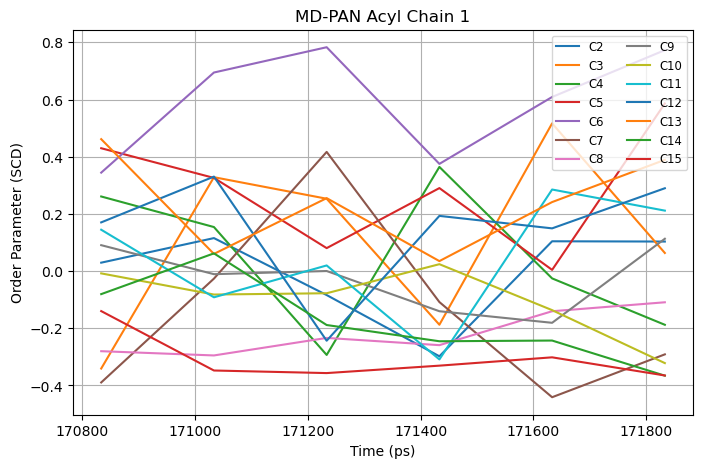

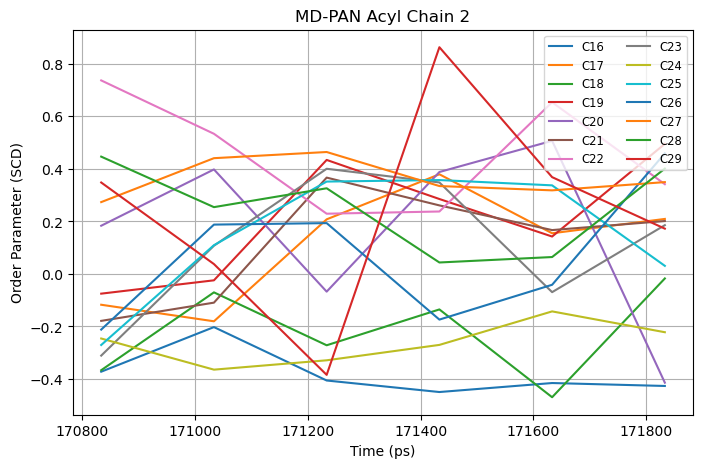

Final Average Order Parameter for Acyl Chain 1: -0.04535
Final Average Order Parameter for Acyl Chain 2: 0.09115


In [26]:
import MDAnalysis as mda
import numpy as np
import glob
import matplotlib.pyplot as plt

# Load topology file
topology = "Production_0.tpr"
xtc_files = sorted(glob.glob("*.xtc"))  # Get all .xtc files

# Bilayer normal along z-axis
bilayer_normal = np.array([0, 0, 1])

# Lists to store results
all_scd_chain1 = []
all_scd_chain2 = []
time_list = []

def compute_order_parameter(universe, chain):
    """
    Compute SCD order parameter for each carbon-carbon bond in a given acyl chain.
    Returns: numpy array of shape (num_frames, num_carbon_atoms-1)
    """
    num_carbons = len(chain.names)
    scd_values = []
    time_steps = []

    for ts in universe.trajectory[::10]:  # Read every 10th frame for efficiency
        frame_scd = np.zeros(num_carbons - 1)  # Store SCD per bond
        positions = chain.positions

        for i in range(num_carbons - 1):
            bond_vector = positions[i + 1] - positions[i]
            bond_vector /= np.linalg.norm(bond_vector)  # Normalize
            cos_theta = np.dot(bond_vector, bilayer_normal)
            frame_scd[i] = 0.5 * (3 * cos_theta**2 - 1)  # Compute SCD
        
        scd_values.append(frame_scd)
        time_steps.append(ts.time)  # Store time in ps

    return np.array(scd_values), np.array(time_steps)  # Shape: (num_frames, num_carbons - 1), (num_frames,)

# Process each trajectory file
for xtc in xtc_files:
    print(f"Processing: {xtc}")
    u = mda.Universe(topology, xtc)

    # Select acyl chains (modify to match your force field)
    lipids = u.select_atoms("resname DOPC")
    chain1 = lipids.select_atoms("name C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15")
    chain2 = lipids.select_atoms("name C16 C17 C18 C19 C20 C21 C22 C23 C24 C25 C26 C27 C28 C29")

    # Compute order parameters over time
    scd_chain1, time_values = compute_order_parameter(u, chain1)  # Shape: (num_frames, 14)
    scd_chain2, _ = compute_order_parameter(u, chain2)  # Shape: (num_frames, 14)

    # Store results
    all_scd_chain1.append(scd_chain1)
    all_scd_chain2.append(scd_chain2)
    time_list.append(time_values)

# Find the common number of frames
common_frames = min(len(time) for time in time_list)  # Align trajectory lengths

# Convert to numpy arrays and correctly average per time step
all_scd_chain1 = np.array([scd[:common_frames] for scd in all_scd_chain1])  # Shape: (num_xtc_files, num_frames, 14)
all_scd_chain2 = np.array([scd[:common_frames] for scd in all_scd_chain2])
time_list = np.array([time[:common_frames] for time in time_list])

# Compute the correct average per carbon index over time
avg_scd_chain1_time = np.mean(all_scd_chain1, axis=0)  # Shape: (num_frames, 14)
avg_scd_chain2_time = np.mean(all_scd_chain2, axis=0)  # Shape: (num_frames, 14)
avg_time = np.mean(time_list, axis=0)  # Average time values

# Carbon indices (for plotting)
carbon_indices_chain1 = np.arange(2, 16)  # C2 to C15
carbon_indices_chain2 = np.arange(16, 30)  # C16 to C29

# **Plot Order Parameter vs. Time for Carbon Indexes (Chain 1)**
plt.figure(figsize=(8, 5))
for i, carbon_index in enumerate(carbon_indices_chain1):
    plt.plot(avg_time, avg_scd_chain1_time[:, i], label=f"C{carbon_index}")
plt.xlabel("Time (ps)")
plt.ylabel("Order Parameter (SCD)")
plt.title("MD-PAN Acyl Chain 1")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid(True)

# **Save high-quality plots**
plt.savefig("MD-PAN_Acyl_Chain1.png", dpi=600, bbox_inches='tight')  # High-resolution PNG
plt.savefig("MD-PAN_Acyl_Chain1.pdf", dpi=600, bbox_inches='tight')  # PDF for publications
plt.show()

# **Plot Order Parameter vs. Time for Carbon Indexes (Chain 2)**
plt.figure(figsize=(8, 5))
for i, carbon_index in enumerate(carbon_indices_chain2):
    plt.plot(avg_time, avg_scd_chain2_time[:, i], label=f"C{carbon_index}")
plt.xlabel("Time (ps)")
plt.ylabel("Order Parameter (SCD)")
plt.title("MD-PAN Acyl Chain 2")
plt.legend(loc="upper right", fontsize="small", ncol=2)
plt.grid(True)

# **Save high-quality plots**
plt.savefig("MD-PAN_Acyl_Chain2.png", dpi=600, bbox_inches='tight')  # High-resolution PNG
plt.savefig("MD-PAN_Acyl_Chain2.pdf", dpi=600, bbox_inches='tight')  # PDF for publications
plt.show()

# Save results for further analysis
np.savetxt("scd_chain1_vs_time.xvg", np.column_stack([avg_time, avg_scd_chain1_time]), fmt="%.5f", header="Time(ps)   SCD Chain 1")
np.savetxt("scd_chain2_vs_time.xvg", np.column_stack([avg_time, avg_scd_chain2_time]), fmt="%.5f", header="Time(ps)   SCD Chain 2")

# Print summary
print(f"Final Average Order Parameter for Acyl Chain 1: {np.mean(avg_scd_chain1_time):.5f}")
print(f"Final Average Order Parameter for Acyl Chain 2: {np.mean(avg_scd_chain2_time):.5f}")

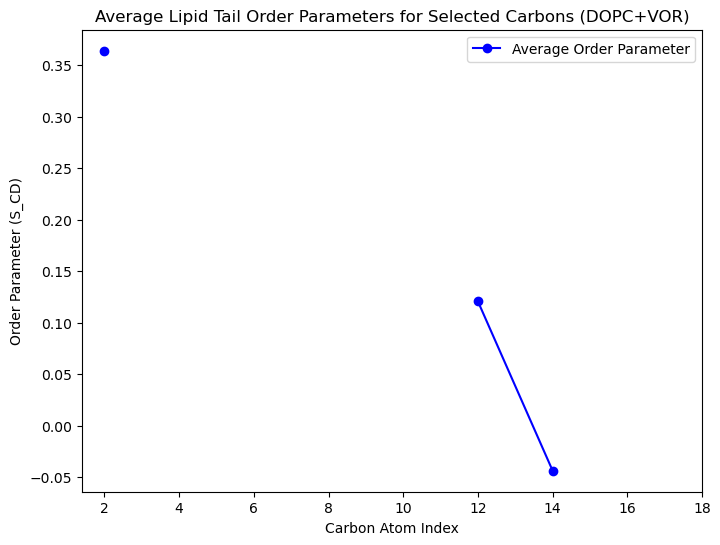

In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def compute_selected_order_parameters(u, lipid_resname="DOPC",
                                      selected_carbons=["C2", "C4", "C6", "C8", "C10", "C12", "C14", "C16", "C18"],
                                      bilayer_normal=[0, 0, 1]):
    """
    Compute the order parameter (S_CD) for selected carbon atoms in DOPC lipid tails.
    
    Parameters:
    - u: MDAnalysis Universe (trajectory)
    - lipid_resname: Name of the lipid in the system (default: "DOPC")
    - selected_carbons: List of carbon atom names to analyze
    - bilayer_normal: Normal vector of the bilayer (default: [0,0,1])
    
    Returns:
    - avg_order_parameters: Dictionary of average order parameters per selected carbon
    """
    lipids = u.select_atoms(f"resname {lipid_resname}")

    # Select only the carbon atoms of interest
    selected_atoms = {carbon: lipids.select_atoms(f"name {carbon}") for carbon in selected_carbons}

    # Store computed order parameters
    order_params = {carbon: [] for carbon in selected_carbons}
    
    for ts in u.trajectory:
        for carbon, atoms in selected_atoms.items():
            cos2_theta_list = []
            for atom in atoms:
                # Check if bond information exists
                if atom.bonded_atoms:
                    # Use actual bonded hydrogen if available
                    ch_bond = atom.position - atom.bonded_atoms[0].position
                else:
                    # Find the closest hydrogen (assuming C-H bond is < 0.12 nm)
                    neighbors = u.atoms.positions - atom.position  # Relative positions
                    distances = np.linalg.norm(neighbors, axis=1)
                    closest_h_index = np.argmin(distances[distances > 0])  # Exclude self

                    ch_bond = atom.position - u.atoms[closest_h_index].position  # Vector along C-H
                
                # Normalize the bond vector
                ch_bond /= np.linalg.norm(ch_bond)
                cos_theta = np.dot(ch_bond, bilayer_normal)  # Compute angle
                cos2_theta_list.append(cos_theta**2)

            # Compute order parameter for this frame
            S_CD = 0.5 * (3 * np.mean(cos2_theta_list) - 1)
            order_params[carbon].append(S_CD)

    # Compute the average order parameters over all frames
    avg_order_parameters = {carbon: np.mean(values) for carbon, values in order_params.items()}

    return avg_order_parameters

# Load the trajectory (use `.tpr` instead of `.gro` if possible)
try:
    u = mda.Universe("Production.tpr", "merged.xtc")  # Preferred method
except:
    u = mda.Universe("dopc_VOR.gro", "merged.xtc")  # Fallback method

# Define selected carbons
selected_carbons = ["C2", "C4", "C6", "C8", "C10", "C12", "C14", "C16", "C18"]

# Compute order parameters
avg_order_params = compute_selected_order_parameters(u, selected_carbons=selected_carbons)

# Extract carbon indices and values for plotting
carbon_indices = [int(c[1:]) for c in selected_carbons]  # Extract numeric part of "C2", "C4", etc.
order_values = [avg_order_params[c] for c in selected_carbons]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(carbon_indices, order_values, marker="o", linestyle="-", color="b", label="Average Order Parameter")
plt.xlabel("Carbon Atom Index")
plt.ylabel("Order Parameter (S_CD)")
plt.title("Average Lipid Tail Order Parameters for Selected Carbons (DOPC+VOR)")
plt.xticks(carbon_indices)
plt.legend()
#plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


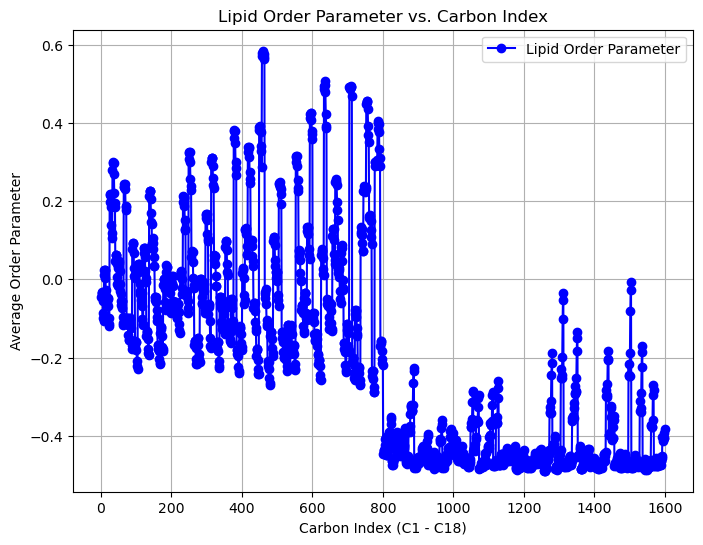

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory and topology
u = mda.Universe("Production.part0006.gro", "merged.xtc")

# Select lipid tail atoms
lipid_tails = u.select_atoms("resname DOPC and name C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15 C16 C17 C18")

# Compute average order parameter
order_params = []
for ts in u.trajectory:
    z_coords = lipid_tails.positions[:, 2]
    S_CD = 0.5 * (3 * (z_coords / np.linalg.norm(lipid_tails.positions, axis=1))**2 - 1)
    order_params.append(S_CD)

avg_order = np.mean(order_params, axis=0)

# Plot results
carbon_indices = np.arange(1, len(avg_order) + 1)
plt.figure(figsize=(8, 6))
plt.plot(carbon_indices, avg_order, marker='o', linestyle='-', color='b', label="Lipid Order Parameter")
plt.xlabel("Carbon Index (C1 - C18)")
plt.ylabel("Average Order Parameter")
plt.title("Lipid Order Parameter vs. Carbon Index")
plt.grid(True)
plt.legend()
plt.show()

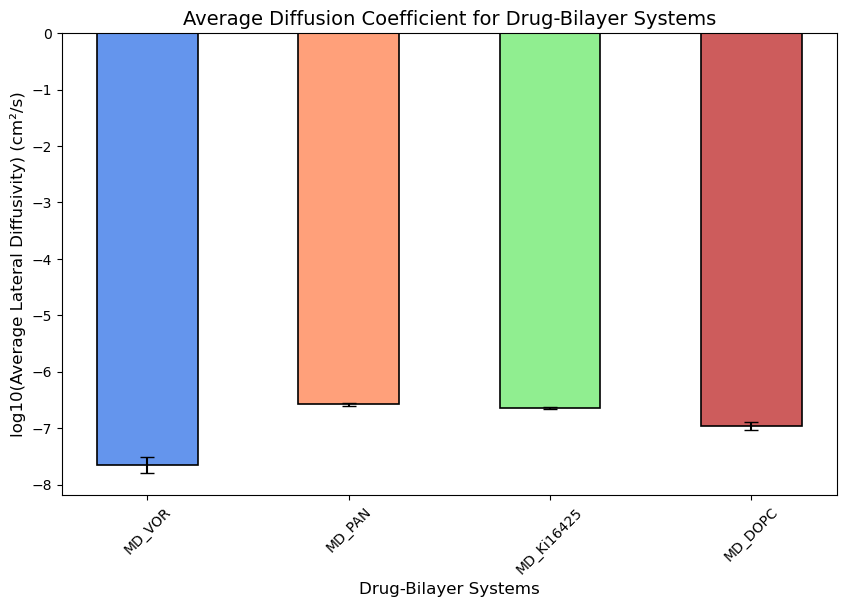

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Drug-Bilayer Systems
systems = ["MD_VOR", "MD_PAN", "MD_Ki16425", "MD_DOPC"]

# Diffusion Coefficients (Head & Tail) in cm²/s
diffusion_head = np.array([2.221E-08, 2.656E-07, 2.30E-07, 1.10E-07])
diffusion_tail = np.array([2.221E-08, 2.6566E-07, 2.30E-07, 1.10E-07])

# Standard Error (Example Values, Adjust as Needed)
error_head = np.array([0.87E-08, 0.18E-07, 0.1E-07, 0.2E-07])
error_tail = np.array([0.87E-08, 0.18E-07, 0.1E-07, 0.2E-07])

# Compute Average Diffusion Coefficients
avg_diffusion = (diffusion_head + diffusion_tail) / 2
avg_error = (error_head + error_tail) / 2  # Average error

# Convert to log scale
log_avg_diffusion = np.log10(avg_diffusion)
log_avg_error = np.abs(np.log10(avg_diffusion + avg_error) - log_avg_diffusion)

# Define colors
colors = ['#6495ED', '#FFA07A', '#90EE90', '#CD5C5C']  # Blue, Orange, Green, Red

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and x positions
x = np.arange(len(systems))  # Position for each system

# Plot bars for Average Diffusion Coefficient
ax.bar(x, log_avg_diffusion, yerr=log_avg_error, color=colors, 
       edgecolor='black', linewidth=1.2, width=0.5, capsize=5, label="Average Diffusion Coefficient")

# Labels and title
ax.set_xlabel("Drug-Bilayer Systems", fontsize=12)
ax.set_ylabel("log10(Average Lateral Diffusivity) (cm²/s)", fontsize=12)
ax.set_title("Average Diffusion Coefficient for Drug-Bilayer Systems", fontsize=14)

# Adjust X-axis
ax.set_xticks(x)
ax.set_xticklabels(systems, fontsize=10, rotation=45)

#ax.legend()

# Save the figure
plt.savefig("Average_Diffusion_Coefficient.png", dpi=600, bbox_inches='tight')

# Show plot
plt.show()

Order parameter 

Average Order Parameters (SCD) per Carbon:
C2: -0.1748
C3: -0.1867
C11: -0.0864
C12: -0.0704
C13: -0.0462
C14: -0.0459
C15: -0.0461


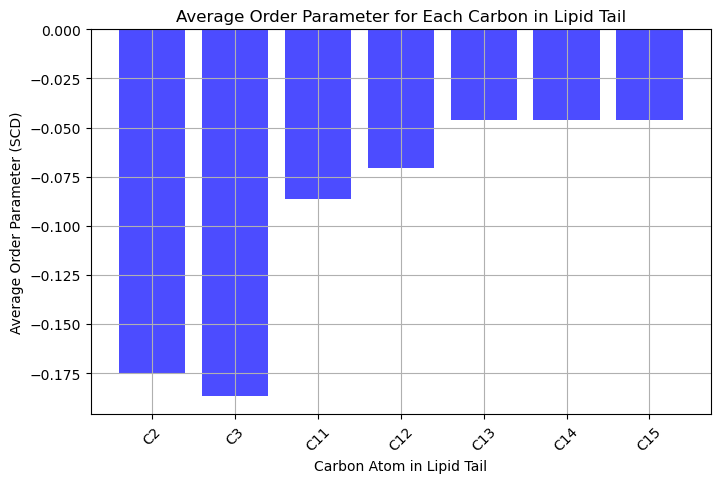

In [14]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def compute_order_parameter(traj_file, top_file, lipid_type="DOPC", tail_atoms=("C2", "C3", "C4", "C5", "C6", 
                                                                               "C7", "C8", "C9", "C10", "C11", 
                                                                               "C12", "C13", "C14", "C15", "C16", "C17")):
    """
    Computes the deuterium order parameter (SCD) for each carbon atom in a lipid bilayer.
    
    Parameters:
        traj_file (str): Path to the trajectory file (.xtc, .dcd).
        top_file (str): Path to the topology file (.gro, .pdb).
        lipid_type (str): Name of the lipid to analyze.
        tail_atoms (tuple): Carbon atoms in the lipid tail.
    
    Returns:
        dict: Dictionary of average order parameters per carbon atom.
    """
    
    # Load trajectory
    u = mda.Universe(top_file, traj_file)

    # Select lipid tails
    order_parameters = {atom: [] for atom in tail_atoms}

    for ts in u.trajectory:
        for atom_name in tail_atoms:
            # Select atoms corresponding to each carbon in the lipid tail
            atoms = u.select_atoms(f"resname {lipid_type} and name {atom_name}")
            if len(atoms) == 0:
                continue

            # Compute order parameter SCD = 0.5 * (3 * cos^2(theta) - 1)
            v = atoms.positions - atoms.center_of_mass()
            cos_theta_sq = (v[:, 2] / np.linalg.norm(v, axis=1)) ** 2
            scd_values = 0.5 * (3 * cos_theta_sq - 1)
            order_parameters[atom_name].extend(scd_values)

    # Compute the average order parameter for each carbon atom
    avg_order_params = {atom: np.mean(order_parameters[atom]) for atom in tail_atoms if len(order_parameters[atom]) > 0}

    return avg_order_params

# Example usage:
traj_file = "merged.xtc"  # Change to your actual trajectory file
top_file = "dopc_VOR.gro"  # Change to your actual topology file

order_params = compute_order_parameter(traj_file, top_file)
print("Average Order Parameters (SCD) per Carbon:")
for atom, value in order_params.items():
    print(f"{atom}: {value:.4f}")

# Plot the order parameters
plt.figure(figsize=(8, 5))
plt.bar(order_params.keys(), order_params.values(), color='blue', alpha=0.7)
plt.xlabel("Carbon Atom in Lipid Tail")
plt.ylabel("Average Order Parameter (SCD)")
plt.title("Average Order Parameter for Each Carbon in Lipid Tail")
plt.xticks(rotation=45)
plt.grid()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Average Order Parameters (SCD) for SN1 and SN2:
C2: -0.0454
C3: -0.0567
C11: 0.0351
C12: 0.0487
C13: 0.0680
C14: 0.0681
C15: 0.0683


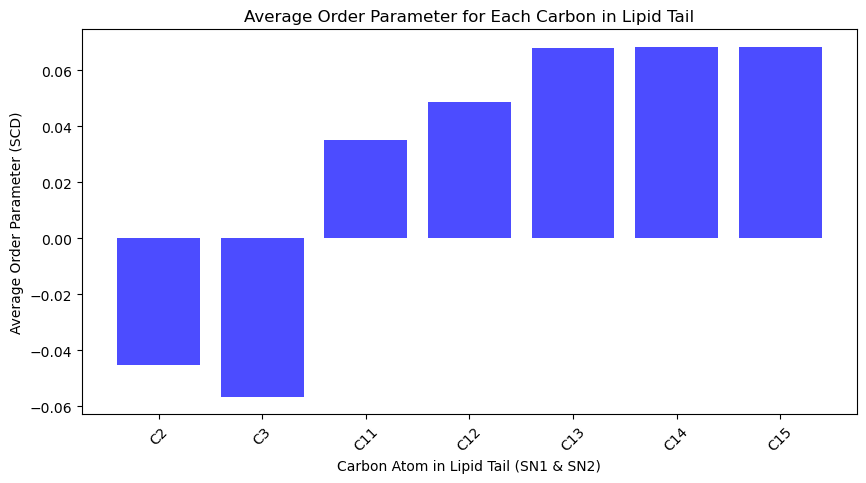

In [21]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def compute_order_parameter(traj_file, top_file, lipid_type="DOPC", 
                            sn1_atoms=("C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", 
                                       "C12", "C13", "C14", "C15", "C16", "C17"),
                            sn2_atoms=("C2B", "C3B", "C4B", "C5B", "C6B", "C7B", "C8B", "C9B", "C10B", 
                                       "C11B", "C12B", "C13B", "C14B", "C15B", "C16B", "C17B")):
    """
    Computes the deuterium order parameter (SCD) for each carbon atom in SN1 and SN2 lipid tails.

    Parameters:
        traj_file (str): Path to trajectory file (.xtc, .dcd).
        top_file (str): Path to topology file (.gro, .pdb).
        lipid_type (str): Name of lipid type to analyze.
        sn1_atoms (tuple): Carbon atoms in SN1 tail.
        sn2_atoms (tuple): Carbon atoms in SN2 tail.

    Returns:
        dict: Average order parameters for SN1 and SN2 carbons.
    """
    
    u = mda.Universe(top_file, traj_file)

    order_parameters = {atom: [] for atom in sn1_atoms + sn2_atoms}

    for ts in u.trajectory:
        for atom_list in [sn1_atoms, sn2_atoms]:
            for atom_name in atom_list:
                # Select atoms corresponding to each carbon in lipid tail
                atoms = u.select_atoms(f"resname {lipid_type} and name {atom_name}")
                if len(atoms) == 0:
                    continue  # Skip missing atoms

                # Compute order parameter SCD = 0.5 * (3 * cos^2(theta) - 1)
                v = atoms.positions - atoms.center_of_mass()
                cos_theta_sq = (v[:, 2] / np.linalg.norm(v, axis=1)) ** 2
                scd_values = 0.5 * (3 * cos_theta_sq - 1)
                order_parameters[atom_name].extend(scd_values)

    # Compute the average order parameter for each carbon atom
    avg_order_params = {atom: np.mean(order_parameters[atom]) for atom in order_parameters if len(order_parameters[atom]) > 0}

    return avg_order_params

# Example usage:
traj_file = "merged.xtc"  # Change to your actual trajectory file
top_file = "dopc_PAN.gro"  # Change to your actual topology file

order_params = compute_order_parameter(traj_file, top_file)
print("Average Order Parameters (SCD) for SN1 and SN2:")
for atom, value in order_params.items():
    print(f"{atom}: {value:.4f}")

# Plot the order parameters
plt.figure(figsize=(10, 5))
plt.bar(order_params.keys(), order_params.values(), color='blue', alpha=0.7)
plt.xlabel("Carbon Atom in Lipid Tail (SN1 & SN2)")
plt.ylabel("Average Order Parameter (SCD)")
plt.title("Average Order Parameter for Each Carbon in Lipid Tail")
plt.xticks(rotation=45)
#plt.grid()
plt.show()


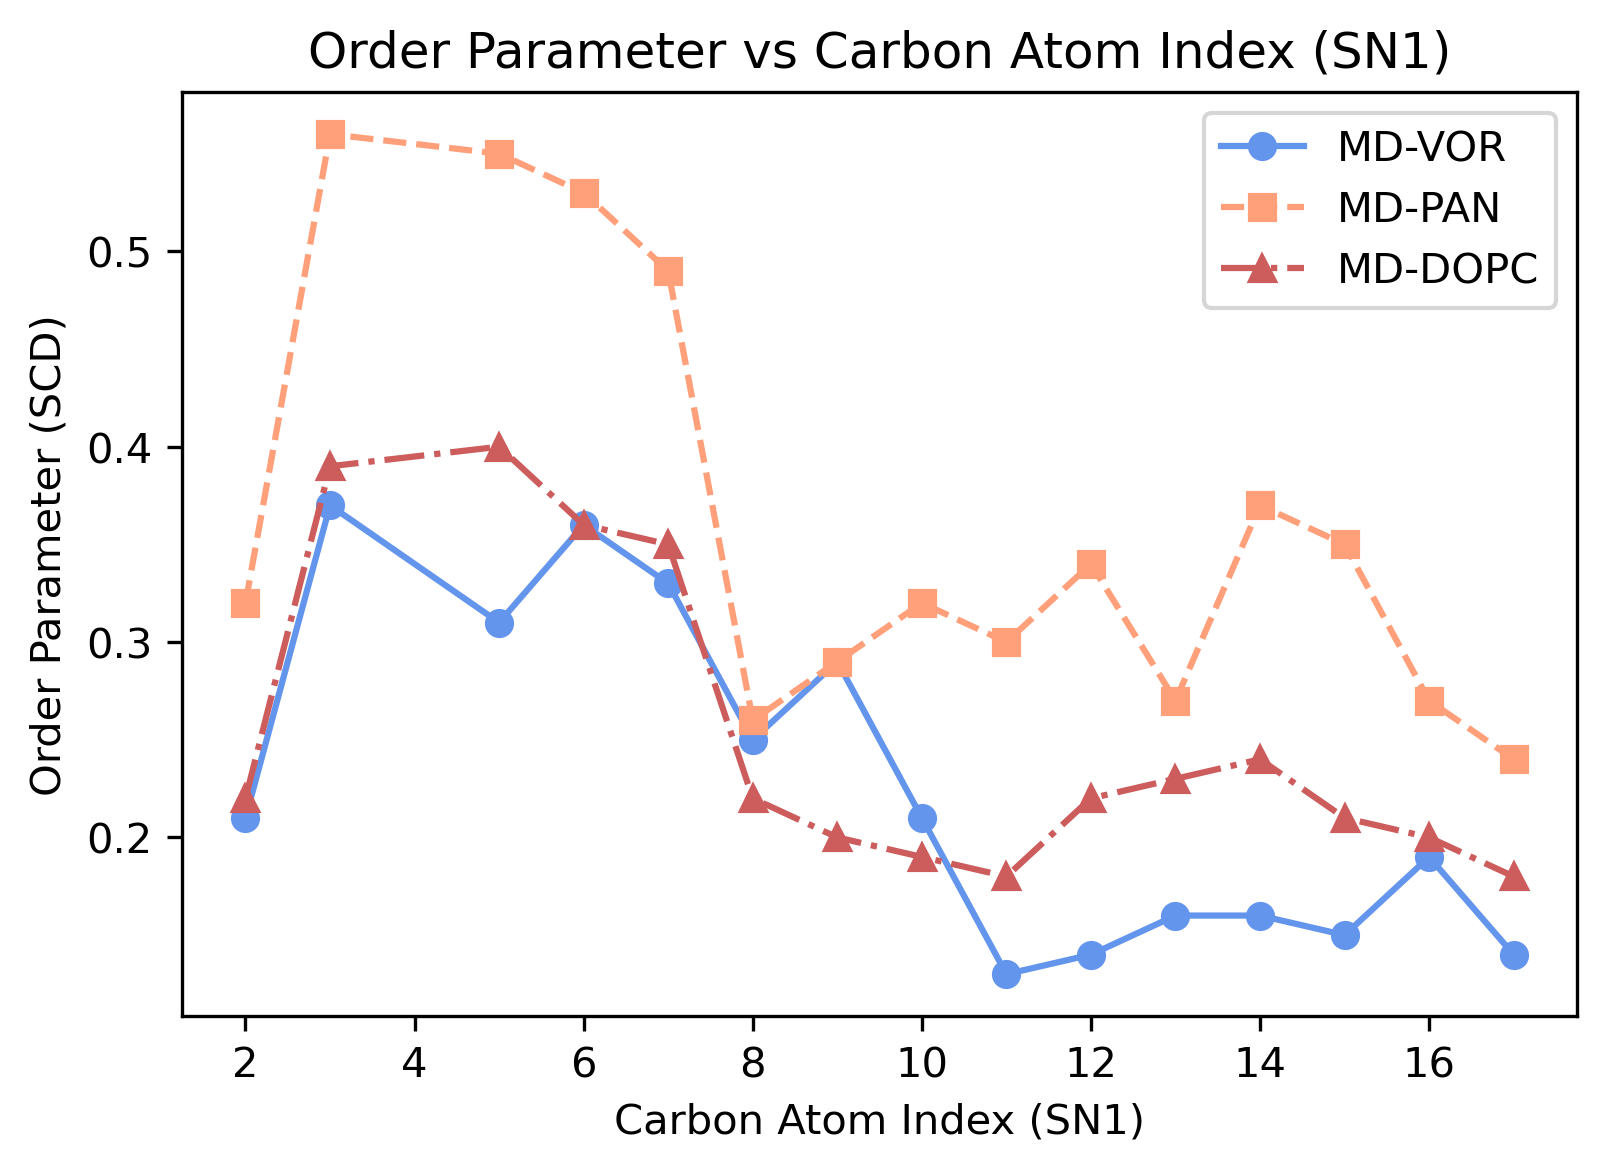

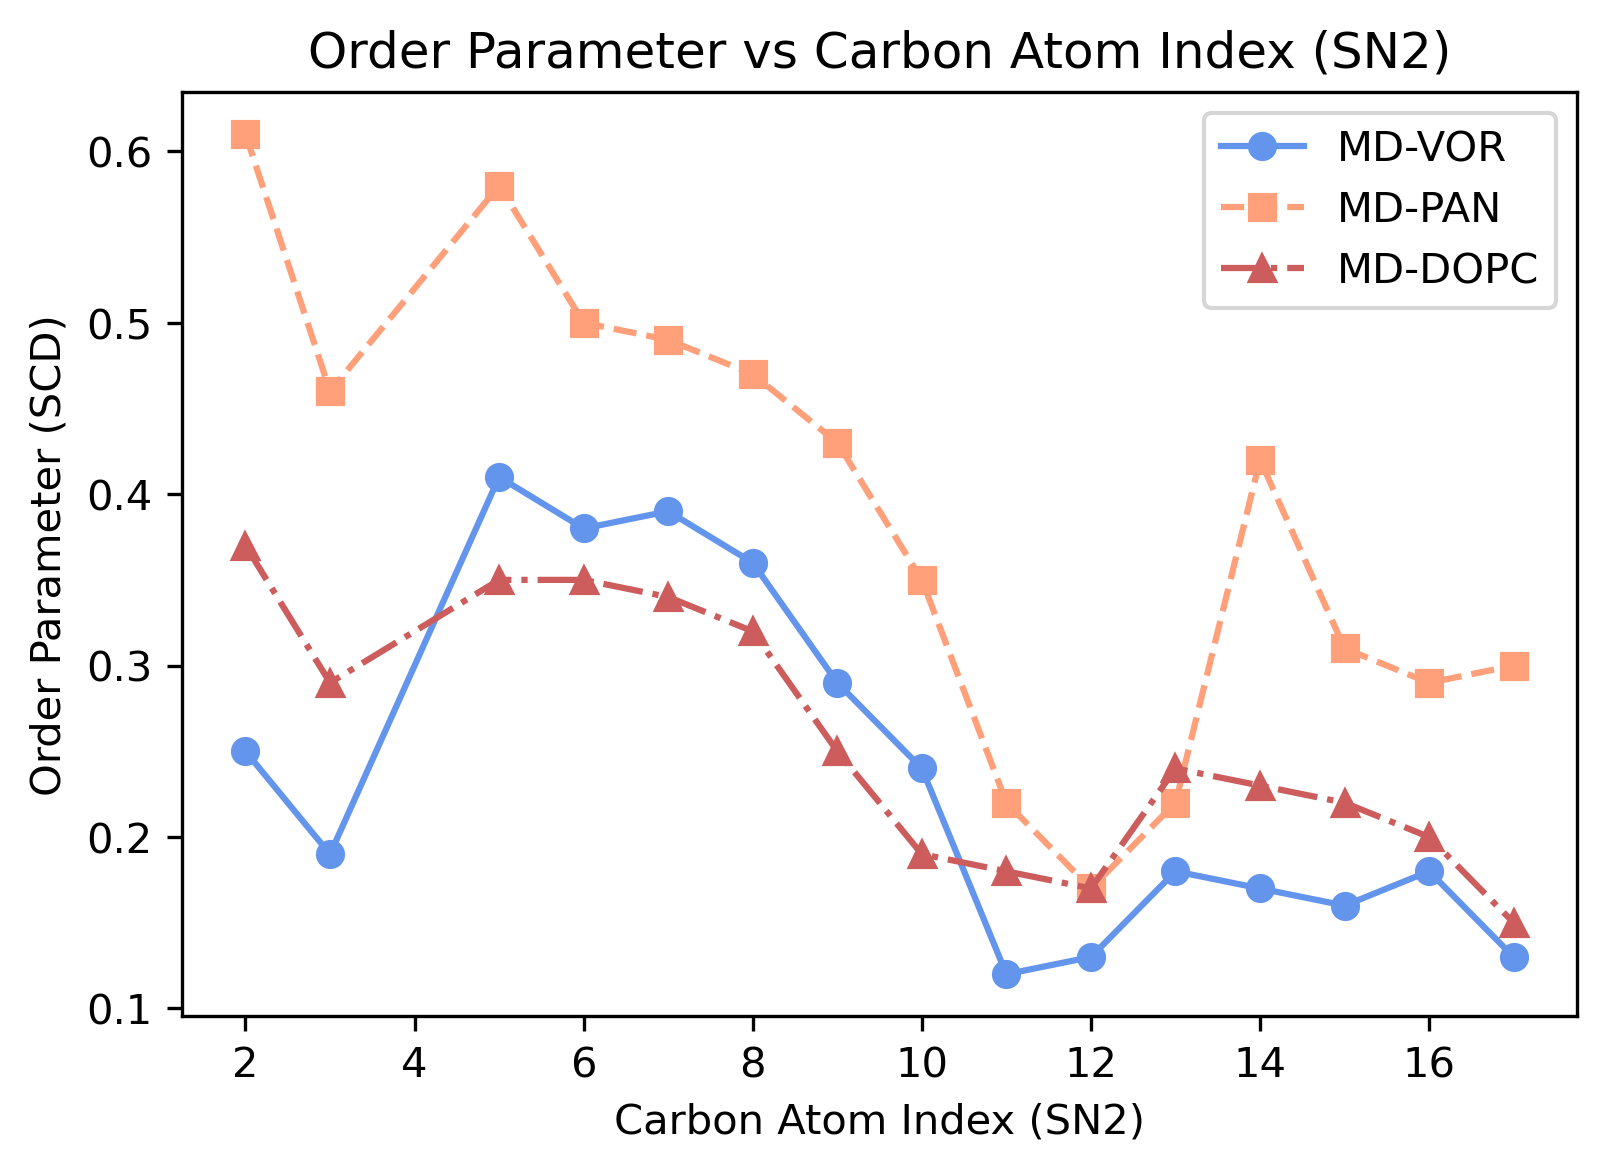

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "Carbon_Index": ["C2", "C3", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17"],
    
    # MD-PAN data
    "MD-PAN_SN1": [0.32, 0.56, 0.55, 0.53, 0.49, 0.26, 0.29, 0.32, 0.3, 0.34, 0.27, 0.37, 0.35, 0.27, 0.24],
    "MD-PAN_SN2": [0.61, 0.46, 0.58, 0.5, 0.49, 0.47, 0.43, 0.35, 0.22, 0.17, 0.22, 0.42, 0.31, 0.29, 0.3],

    # MD-VOR data
    "MD-VOR_SN1": [0.21, 0.37, 0.31, 0.36, 0.33, 0.25, 0.29, 0.21, 0.13, 0.14, 0.16, 0.16, 0.15, 0.19, 0.14],
    "MD-VOR_SN2": [0.25, 0.19, 0.41, 0.38, 0.39, 0.36, 0.29, 0.24, 0.12, 0.13, 0.18, 0.17, 0.16, 0.18, 0.13],

    # MD-DOPC data
    "MD-DOPC_SN1": [0.22, 0.39, 0.4, 0.36, 0.35, 0.22, 0.2, 0.19, 0.18, 0.22, 0.23, 0.24, 0.21, 0.2, 0.18],
    "MD-DOPC_SN2": [0.37, 0.29, 0.35, 0.35, 0.34, 0.32, 0.25, 0.19, 0.18, 0.17, 0.24, 0.23, 0.22, 0.2, 0.15]
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Convert Carbon_Index to numeric for plotting
df["Carbon_Index_Num"] = df["Carbon_Index"].str.extract("(\d+)").astype(int)

# Define color coding
colors = ['#6495ED', '#FFA07A', '#CD5C5C']  # Blue (MD-VOR), Orange (MD-PAN), Red (MD-DOPC)

# Plot Order Parameter for SN1 (Chain 1)
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(df["Carbon_Index_Num"], df["MD-VOR_SN1"], marker='o', linestyle='-', color=colors[0], label="MD-VOR")
plt.plot(df["Carbon_Index_Num"], df["MD-PAN_SN1"], marker='s', linestyle='--', color=colors[1], label="MD-PAN")
plt.plot(df["Carbon_Index_Num"], df["MD-DOPC_SN1"], marker='^', linestyle='-.', color=colors[2], label="MD-DOPC")
plt.xlabel("Carbon Atom Index (SN1)")
plt.ylabel("Order Parameter (SCD)")
plt.title("Order Parameter vs Carbon Atom Index (SN1)")
plt.legend()
#plt.grid()
plt.savefig("Order_Parameter_SN1.png", dpi=300, bbox_inches="tight")  # Save as high-quality PNG
plt.savefig("Order_Parameter_SN1.pdf", dpi=300, bbox_inches="tight")  # Save as high-quality PDF
plt.show()

# Plot Order Parameter for SN2 (Chain 2)
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(df["Carbon_Index_Num"], df["MD-VOR_SN2"], marker='o', linestyle='-', color=colors[0], label="MD-VOR")
plt.plot(df["Carbon_Index_Num"], df["MD-PAN_SN2"], marker='s', linestyle='--', color=colors[1], label="MD-PAN")
plt.plot(df["Carbon_Index_Num"], df["MD-DOPC_SN2"], marker='^', linestyle='-.', color=colors[2], label="MD-DOPC")
plt.xlabel("Carbon Atom Index (SN2)")
plt.ylabel("Order Parameter (SCD)")
plt.title("Order Parameter vs Carbon Atom Index (SN2)")
plt.legend()
#plt.grid()
plt.savefig("Order_Parameter_SN2.png", dpi=300, bbox_inches="tight")  # Save as high-quality PNG
plt.savefig("Order_Parameter_SN2.pdf", dpi=300, bbox_inches="tight")  # Save as high-quality PDF
plt.show()

Lateral Diffusivity of lipids in pure DOPC

100%|███████████████████████████████████████| 286/286 [00:00<00:00, 1501.86it/s]


Lateral Diffusivity D_xy: 0.0011 Å²/ps


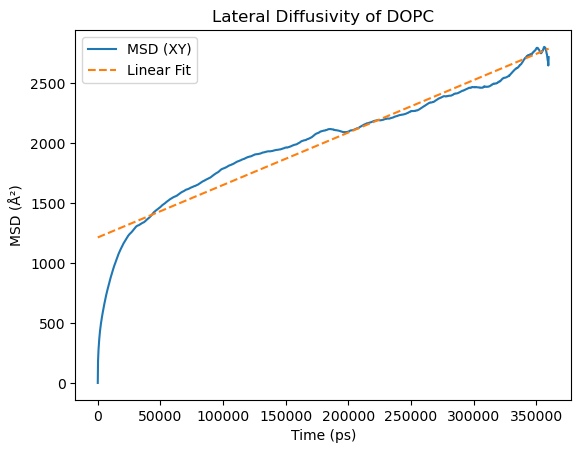

In [8]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np

# Load your trajectory (update with your actual file names)
u = mda.Universe("step5_input.psf", "step7_production.dcd")

# Select lipid headgroup atoms (e.g., phosphorus atoms of DOPC)
selection = "resname DOPC and name P"
msd = EinsteinMSD(u, select=selection, msd_type='xy', fft=True)
msd.run()

# Extract MSD and time values from the result arrays
# EinsteinMSD stores the result in `msd.results.timeseries`, not `results.times`
msd_data = msd.results.timeseries  # shape: (n_frames,)

# Generate the corresponding time array manually
dt = u.trajectory.dt  # timestep in ps
n_frames = len(msd_data)
time = np.arange(n_frames) * dt

# Linear fit to MSD (ignoring first few frames)
fit_start = 10
slope, intercept = np.polyfit(time[fit_start:], msd_data[fit_start:], 1)

# Lateral diffusivity in 2D
D_xy = slope / 4  # for 2D: 1/4 * d(MSD)/dt

print(f"Lateral Diffusivity D_xy: {D_xy:.4f} Å²/ps")

# Plot
plt.plot(time, msd_data, label='MSD (XY)')
plt.plot(time, slope * time + intercept, '--', label='Linear Fit')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('Lateral Diffusivity of DOPC')
plt.legend()
plt.show()

100%|███████████████████████████████████████| 286/286 [00:00<00:00, 1626.63it/s]


Lateral Diffusivity D_xy: 1.0931e-03 Å²/ps
Standard Error: 5.26e-06 Å²/ps
Percentage Error: 0.48%
Lateral Diffusivity D_xy: 1.0931e-07 cm²/s


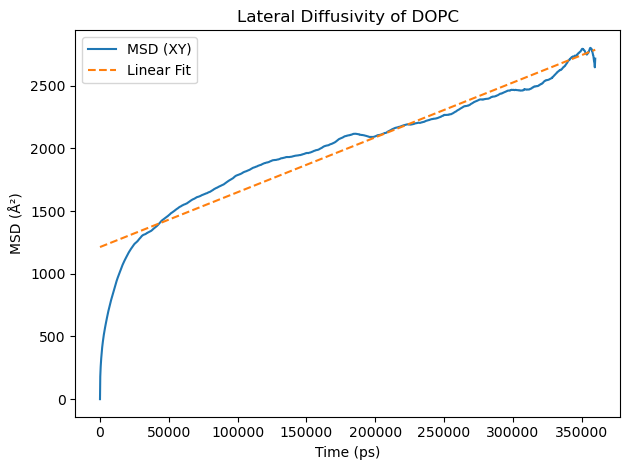

In [8]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load trajectory
u = mda.Universe("step5_input.psf", "step7_production.dcd")

# Select acyl chain atoms or headgroup (example: phosphorus atom)
selection = "resname DOPC and name P"
msd = EinsteinMSD(u, select=selection, msd_type='xy', fft=True)
msd.run()

# Extract MSD data
msd_data = msd.results.timeseries
dt = u.trajectory.dt  # time step in ps
n_frames = len(msd_data)
time = np.arange(n_frames) * dt

# Fit line to MSD curve (ignore initial non-linear part)
fit_start = 10
slope, intercept, r_value, p_value, stderr = linregress(time[fit_start:], msd_data[fit_start:])

# Lateral diffusivity
D_xy = slope / 4  # Å²/ps
D_xy_stderr = stderr / 4
percent_error = (stderr / slope) * 100

# Convert to cm²/s
D_xy_cm2_s = D_xy * 1e-4
D_xy_stderr_cm2_s = D_xy_stderr * 1e-4

print(f"Lateral Diffusivity D_xy: {D_xy:.4e} Å²/ps")
print(f"Standard Error: {D_xy_stderr:.2e} Å²/ps")
print(f"Percentage Error: {percent_error:.2f}%")

print(f"Lateral Diffusivity D_xy: {D_xy_cm2_s:.4e} cm²/s")

# Plot
plt.plot(time, msd_data, label='MSD (XY)')
plt.plot(time, slope * time + intercept, '--', label='Linear Fit')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('Lateral Diffusivity of DOPC')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

100%|██████████████████████████████████████| 4214/4214 [00:20<00:00, 204.01it/s]


Lateral Diffusivity D_xy: -1.1261e-04 Å²/ps
Standard Error: 1.83e-06 Å²/ps
Percentage Error: -1.62%
Lateral Diffusivity D_xy: -1.1261e-08 cm²/s ± 1.83e-10 cm²/s


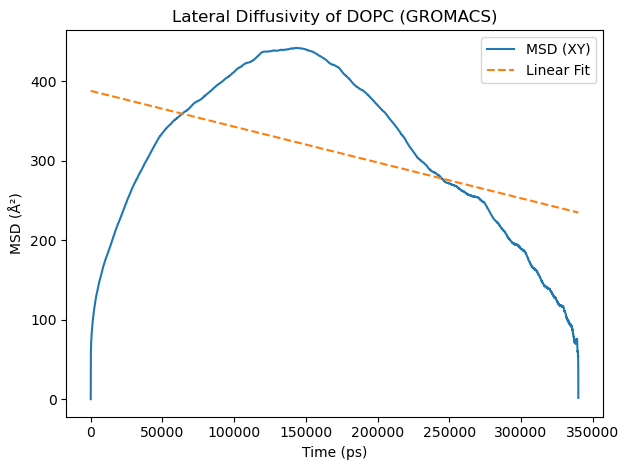

In [50]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import glob

# Automatically load multiple xtc files (sorted)
xtc_files = sorted(glob.glob("*.xtc"))
u = mda.Universe("dopc_PAN.gro", xtc_files)

# Select DOPC atoms – adjust atom name based on what you want (e.g., headgroup or acyl chain atoms)
selection = "resname LIG"  # Example: acyl chain carbon, replace with actual atom name

msd = EinsteinMSD(u, select=selection, msd_type='xy', fft=True)
msd.run()

# Extract MSD data
msd_data = msd.results.timeseries
dt = u.trajectory.dt  # time step in ps
n_frames = len(msd_data)
time = np.arange(n_frames) * dt

# Fit MSD curve (skip initial points)
fit_start = 10
slope, intercept, r_value, p_value, stderr = linregress(time[fit_start:], msd_data[fit_start:])

# Lateral diffusivity in Å²/ps
D_xy = slope / 4
D_xy_stderr = stderr / 4
percent_error = (stderr / slope) * 100

# Convert to cm²/s
D_xy_cm2_s = D_xy * 1e-4
D_xy_stderr_cm2_s = D_xy_stderr * 1e-4

# Print results
print(f"Lateral Diffusivity D_xy: {D_xy:.4e} Å²/ps")
print(f"Standard Error: {D_xy_stderr:.2e} Å²/ps")
print(f"Percentage Error: {percent_error:.2f}%")
print(f"Lateral Diffusivity D_xy: {D_xy_cm2_s:.4e} cm²/s ± {D_xy_stderr_cm2_s:.2e} cm²/s")

# Plot
plt.plot(time, msd_data, label='MSD (XY)')
plt.plot(time, slope * time + intercept, '--', label='Linear Fit')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('Lateral Diffusivity of DOPC (GROMACS)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

100%|████████████████████████████████████████| 200/200 [00:01<00:00, 184.81it/s]


Lateral Diffusivity D_xy: -1.1174e-04 Å²/ps
Standard Error: 4.06e-06 Å²/ps
Percentage Error: -3.64%
Lateral Diffusivity D_xy: -1.1174e-08 cm²/s ± 4.06e-10 cm²/s


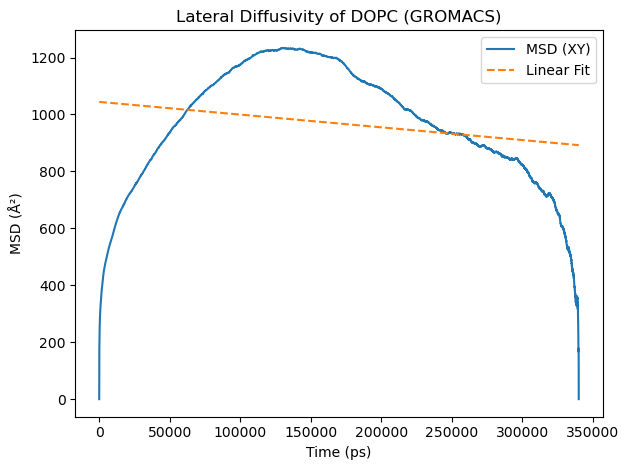

In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import glob

# Automatically load multiple xtc files (sorted)
xtc_files = sorted(glob.glob("*.xtc"))
u = mda.Universe("dopc_PAN.gro", xtc_files)

# Select DOPC atoms – adjust atom name based on what you want (e.g., headgroup or acyl chain atoms)
selection = "resname DOPC and name P"  # Example: acyl chain carbon, replace with actual atom name

msd = EinsteinMSD(u, select=selection, msd_type='xy', fft=True)
msd.run()

# Extract MSD data
msd_data = msd.results.timeseries
dt = u.trajectory.dt  # time step in ps
n_frames = len(msd_data)
time = np.arange(n_frames) * dt

# Fit MSD curve (skip initial points)
fit_start = 10
slope, intercept, r_value, p_value, stderr = linregress(time[fit_start:], msd_data[fit_start:])

# Lateral diffusivity in Å²/ps
D_xy = slope / 4
D_xy_stderr = stderr / 4
percent_error = (stderr / slope) * 100

# Convert to cm²/s
D_xy_cm2_s = D_xy * 1e-4
D_xy_stderr_cm2_s = D_xy_stderr * 1e-4

# Print results
print(f"Lateral Diffusivity D_xy: {D_xy:.4e} Å²/ps")
print(f"Standard Error: {D_xy_stderr:.2e} Å²/ps")
print(f"Percentage Error: {percent_error:.2f}%")
print(f"Lateral Diffusivity D_xy: {D_xy_cm2_s:.4e} cm²/s ± {D_xy_stderr_cm2_s:.2e} cm²/s")

# Plot
plt.plot(time, msd_data, label='MSD (XY)')
plt.plot(time, slope * time + intercept, '--', label='Linear Fit')
plt.xlabel('Time (ps)')
plt.ylabel('MSD (Å²)')
plt.title('Lateral Diffusivity of DOPC (GROMACS)')
plt.legend()
plt.grid(False) 
plt.tight_layout()
plt.show()

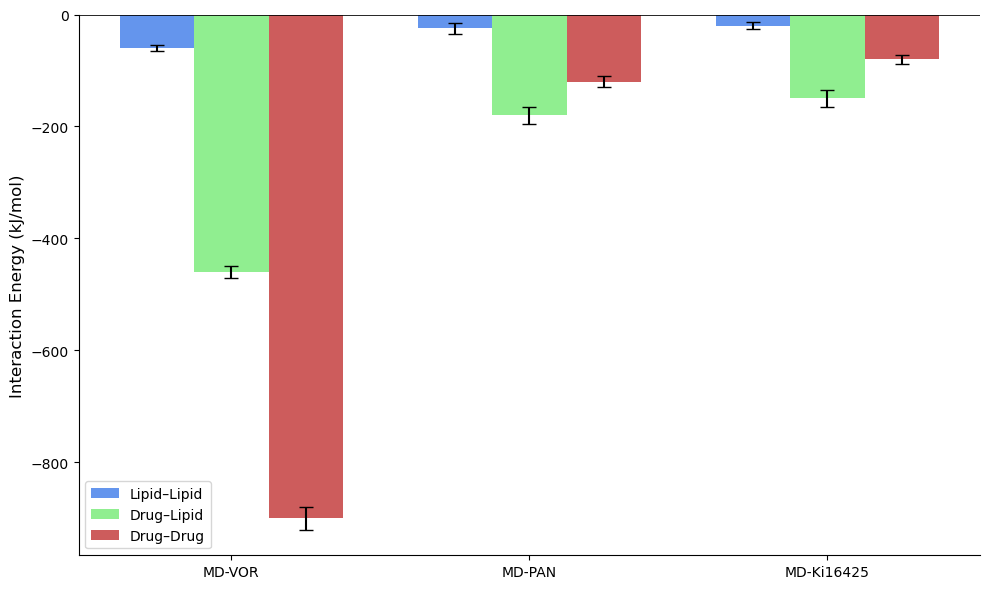

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
systems = ['MD-VOR', 'MD-PAN', 'MD-Ki16425']
categories = ['Lipid–Lipid', 'Drug–Lipid', 'Drug–Drug']

# Interaction energies (kJ/mol)
data = [
    [-60, -460, -900],   # MD-VOR
    [-25, -180, -120],   # MD-PAN
    [-20, -150, -80]     # MD-Ki16425
]
data = np.array(data).T  # shape: 3 x 3 (categories x systems)

# Simulated error bars (replace with real errors if available)
errors = [
    [5, 10, 6],   # Lipid–Lipid errors for 3 systems
    [10, 15, 15],  # Drug–Lipid
    [20, 10, 8]    # Drug–Drug
]
errors = np.array(errors)

# Plot setup
x = np.arange(len(systems))  # [0, 1, 2]
bar_width = 0.25
spacing = bar_width 

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots with error bars
bars1 = ax.bar(x - width, data[0], width, yerr=errors[0], label='Lipid–Lipid',
               capsize=5, color='#6495ED')
bars2 = ax.bar(x,         data[1], width, yerr=errors[1], label='Drug–Lipid',
               capsize=5, color='#90EE90')
bars3 = ax.bar(x + width, data[2], width, yerr=errors[2], label='Drug–Drug',
               capsize=5, color='#CD5C5C')

# Aesthetics
ax.set_ylabel('Interaction Energy (kJ/mol)', fontsize=12)
#ax.set_title('Interaction Energies by Type and System', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(systems)
ax.axhline(0, color='black', linewidth=1.2)
ax.legend()
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.savefig("interaction_energy_comparison_with_errors.png", dpi=600, bbox_inches="tight")
plt.show()


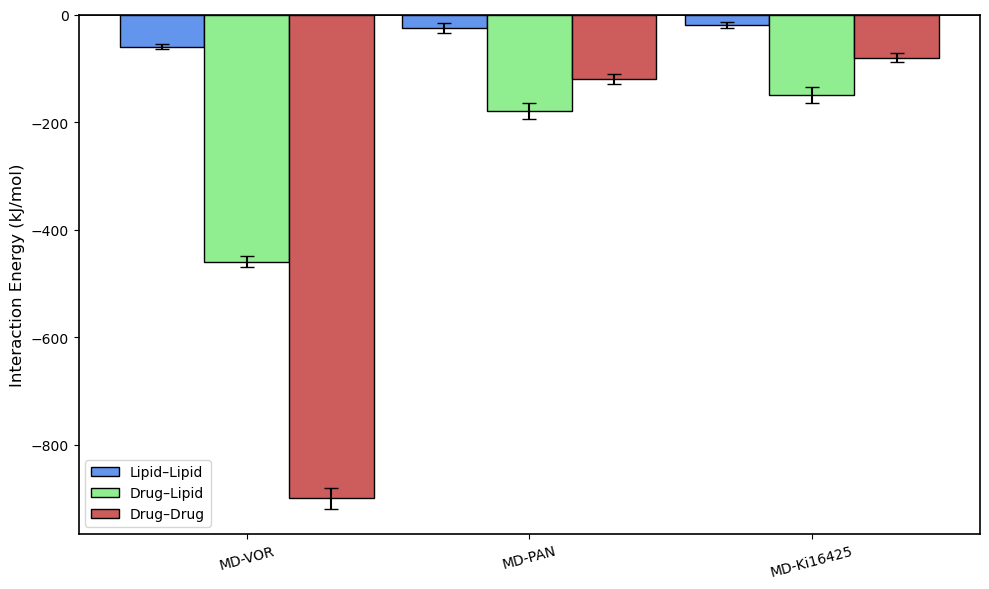

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Labels
systems = ['MD-VOR', 'MD-PAN', 'MD-Ki16425']
categories = ['Lipid–Lipid', 'Drug–Lipid', 'Drug–Drug']

# Interaction energies (kJ/mol)
data = [
    [-60, -460, -900],   # MD-VOR
    [-25, -180, -120],   # MD-PAN
    [-20, -150, -80]     # MD-Ki16425
]
data = np.array(data).T  # shape: (3 categories) x (3 systems)

# Error bars (simulated, replace with real values if available)
errors = [
    [5, 10, 6],   # Lipid–Lipid
    [10, 15, 15],  # Drug–Lipid
    [20, 10, 8]    # Drug–Drug
]
errors = np.array(errors)

# Bar setup
x = np.arange(len(systems))  # [0, 1, 2]
bar_width = 0.3  # tighter bar width like the attached plot
offset = bar_width  # offset between bar groups

fig, ax = plt.subplots(figsize=(10, 6))  # Similar figure size to attached

# Bar plots with error bars
ax.bar(x - offset, data[0], bar_width, yerr=errors[0], label='Lipid–Lipid',
       capsize=5, color='#6495ED', edgecolor='black')
ax.bar(x,          data[1], bar_width, yerr=errors[1], label='Drug–Lipid',
       capsize=5, color='#90EE90', edgecolor='black')
ax.bar(x + offset, data[2], bar_width, yerr=errors[2], label='Drug–Drug',
       capsize=5, color='#CD5C5C', edgecolor='black')

# Aesthetics
ax.set_ylabel('Interaction Energy (kJ/mol)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(systems)
ax.axhline(0, color='black', linewidth=1.2)
ax.legend()
ax.tick_params(axis='x', labelrotation=15)

# ✅ Ensure full border is visible
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.savefig("IE.png", dpi=600, bbox_inches="tight")
plt.show()